<div style="color:white; background-color: #56a0d3; padding: 20px; border-radius:8px; font-size:26px"><b style="font-weight: 700;"><center>CAR PRICE PREDICTION (EDA) (12.01.2024)</center></b></div>

<div style="color:#56a0d3; border: 2px solid #56a0d3; padding: 10px;"><b style="font-weight: 700;"><center> The Data </center></b></div>

The Dataset is updated by a Kaggle user [(source here)](https://www.kaggle.com/datasets/thayakumarum/car-prediction-data)



| Column Name        | Details                                                     |
|--------------------|-------------------------------------------------------------|
| `ID`               | Unique identifier for each car entry.                       |
| `Price`            | Target variable representing the price of the car.          |
| `Levy`             | Tax or duty imposed on the car                              |
| `Manufacturer`     | Company that produced the car.                              |
| `Category`         | Classification of the car (e.g., sedan, SUV, etc.).         |
| `Leather interior` | Indicates if the car has a leather interior.                |
| `Fuel type`        | Type of fuel the car uses (e.g., petrol, diesel, hybrid).   |
| `Engine volume`    | Capacity of the car's engine.                               |
| `Mileage`          | Total distance the car has traveled.                        |
| `Cylinders`        | Number of cylinders in the car's engine.                    |
| `Gear box type`    | Type of transmission (e.g., automatic, manual).             |
| `Drive wheels`     | Configuration of wheels that receive power from the engine. |
| `Doors`            | Number of doors on the car.                                 |
| `Wheel`            | Type of wheel the car has (e.g., alloy, steel).             |
| `Color`            | Exterior color of the car.                                  |
| `Airbags`          | Number of airbags installed in the car for safety.          |

<div style="color:#56a0d3; border: 2px solid #56a0d3; padding: 10px;"><b style="font-weight: 700;"><center> Regression Problem </center></b></div>

<b style="font-weight: 700; font-size: 18px"> Predicting the cars price based on various features </b>

Within the framework of the type of problem, the following questions are of great interest:
- Which features are significant in predicting the price of a car.
- How well those variables describe the price of a car.

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

### Setting up colors preferences:
The following code customizes the appearance of plots using seaborn by setting background colors and defining a custom color palette for use in the plots.

In [2]:
from matplotlib import colors

# Customize the appearance of plots: (both the axes and the figure have a background color of #FFF9ED, which is a light beige color.)
sns.set(rc={"axes.facecolor":"#f5f7fa","figure.facecolor":"#f5f7fa"})                              # <-- `rc` stands for "runtime configuration" and allows you to set various properties of the plot.
                                                                                                   # <-- `"axes.facecolor"` sets the background color of the plot's axes.
                                                                                                   # <-- `"figure.facecolor"` sets the background color of the entire figure.

# These colors will be used in the plots created with seaborn:
palette = ['#56a0d3', '#8a8acb', '#ee70a6', '#c587b3', '#c1b0d5']


cmap = colors.ListedColormap(['#56a0d3', '#8a8acb', '#ee70a6', '#c587b3', '#c1b0d5'])              # <-- `cmap` is short for colormap, which is used for mapping data values to colors in a plot.
                                                                                                   #     This `cmap` could be used in a plot that requires a colormap (e.g., heatmap, scatter plot with color-coding).
                                                                                                   # <-- `colors.ListedColormap` is a function from the matplotlib library, which seaborn uses internally for plotting.

<div class="list-group" id="list-tab" role="tablist", style="font-weight: 700; font-size: 18px">

## TABLE OF CONTENTS

- <a href='#1'>1. READING AND UNDERSTANDING DATA</a>
- <a href='#2'>2. DATA CLEANING </a>
- <a href='#3'>3. DATA EXPLORATION</a>
    - <a href='#3-1'>3.1 Target</a>
    - <a href='#3-2'>3.2 Categorical features</a>
    - <a href='#3-3'>3.3 Numerical features</a>
- <a href='#4'>4. DATA CLEANING</a>
    - <a href='#4-1'>4.1 Missing Values</a>
    - <a href='#4-2'>4.2 Outliers</a>
</div>

<div style="background-color: rgba(86, 160, 211, 0.2); padding: 10px;"> <center>1. READING AND UNDERSTANDING DATA </center></div>


In [3]:
# load the data
df = pd.read_csv("D:/git/Laboratory/Car Price Prediction (12-01-24)/car_prediction.csv", na_values='-')
df.head()


,ID,Manufacturer_ID,Price,Levy,Manufacturer,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,0,13328,1399.0,LEXUS,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,1,16621,1018.0,CHEVROLET,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,2,8467,NaN,HONDA,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3,3607,862.0,FORD,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,2,11726,446.0,HONDA,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.shape

(19237, 17)

In [5]:
# First general overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Manufacturer_ID   19237 non-null  int64  
 2   Price             19237 non-null  int64  
 3   Levy              13418 non-null  float64
 4   Manufacturer      19237 non-null  object 
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

- There are missing values in `Levy`.
- Some data types are not correct.
</div>

<div style="background-color: rgba(86, 160, 211, 0.2); padding: 10px;"> <center>2. DATA WRANGLING </center></div>


<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

- Drop the redundant `Manufacturer_ID` column because contain the same info as `Manufacturer` column.
- Remove km from the data in the column `Mileage` and replace the column name by `Mileage_(km)`
- Replace the [space] in column names by `-`
- Replace by Lower Letters the data in the `Manufacturer` column.

</div>

In [6]:
# Lower case for column 'Manufacturer'
df['Manufacturer'] = df['Manufacturer'].str.lower()

# -------------------------------------------------------------------
# Replace the [space] in column names by `-`
column_names = list(df.columns)
mod_names = [s.replace(' ', '_') for s in column_names]

df.columns = mod_names

# -------------------------------------------------------------------
# Remove km from column 'Mileage'
df['Mileage'] = df['Mileage'].apply(lambda x: x.split()[0])

# Replace 'Mileage' by 'Mileage_km'
df.rename(columns={'Mileage': 'Mileage_Km'}, inplace=True)
# -------------------------------------------------------------------


df.head()

,ID,Manufacturer_ID,Price,Levy,Manufacturer,Category,Leather_interior,Fuel_type,Engine_volume,Mileage_Km,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,0,13328,1399.0,lexus,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,1,16621,1018.0,chevrolet,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,2,8467,NaN,honda,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3,3607,862.0,ford,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,2,11726,446.0,honda,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Duplicates
</div>

In [7]:
print('Number of duplicates in the dataset: ', df.duplicated().sum())

print('Duplicate rows: ')
# Checking for the duplicates
df.loc[df.duplicated()]

Number of duplicates in the dataset:  313
Duplicate rows: 


,ID,Manufacturer_ID,Price,Levy,Manufacturer,Category,Leather_interior,Fuel_type,Engine_volume,Mileage_Km,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
425,45815372,6,7840,NaN,mercedes-benz,Sedan,No,CNG,2,180003,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,5,8781,NaN,toyota,Hatchback,No,Petrol,1.5,117000,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,5,18503,NaN,toyota,Sedan,No,Petrol,1.8,162000,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,6,20385,NaN,mercedes-benz,Sedan,Yes,Petrol,5,230000,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,5,8781,NaN,toyota,Hatchback,No,Petrol,1.5,117000,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,0,2352,1273.0,lexus,Sedan,Yes,Petrol,3.5,80856,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,1,15125,642.0,chevrolet,Jeep,Yes,Diesel,2,156834,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,6,36065,640.0,mercedes-benz,Sedan,Yes,Petrol,2.0 Turbo,68000,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,5,13485,645.0,toyota,Sedan,No,Hybrid,1.8,281600,6.0,Automatic,Front,04-May,Left wheel,Grey,8


In [8]:
# Keeping only the first occurrence and removing the duplicates
df_nd = df.drop_duplicates()
print("\nDataFrame size after removing duplicates:")
print(df_nd.shape)


DataFrame size after removing duplicates:
(18924, 17)


In [9]:
print('Number of duplicates in the updated dataset: ', df_nd.duplicated().sum())

Number of duplicates in the updated dataset:  0


<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Checking for data types
</div>

In [10]:
df_nd.dtypes

ID                    int64
Manufacturer_ID       int64
Price                 int64
Levy                float64
Manufacturer         object
Category             object
Leather_interior     object
Fuel_type            object
Engine_volume        object
Mileage_Km           object
Cylinders           float64
Gear_box_type        object
Drive_wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [11]:
# Changing the type of 'Mileage_km' to float
df_nd['Mileage_Km'] = df_nd['Mileage_Km'].astype('float')

df_nd.dtypes

ID                    int64
Manufacturer_ID       int64
Price                 int64
Levy                float64
Manufacturer         object
Category             object
Leather_interior     object
Fuel_type            object
Engine_volume        object
Mileage_Km          float64
Cylinders           float64
Gear_box_type        object
Drive_wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Checking for unique values
</div>

In [12]:
df_nd['Engine_volume'].value_counts()

Engine_volume
2            3856
2.5          2246
1.8          1743
1.6          1446
1.5          1289
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: count, Length: 107, dtype: int64

In [13]:
# Identify strings containing 'Turbo' and add 0.01 (can be done in one-line code, but I use more lines for self-reminder and self-preparation )

# Create the mask to identfy the rows
mask = df_nd['Engine_volume'].str.contains('Turbo')

# Replace the ' Turbo' with '' and add 0.01 in each row selected by mask
df_nd.loc[mask, 'Engine_volume'] = (df_nd.loc[mask, 'Engine_volume'].str.replace(' Turbo','').astype(float) + 0.01)

# Change to float the column 'Engine_volume'
df_nd['Engine_volume'] = df_nd['Engine_volume'].astype(float)

In [14]:
df_nd.head(1000)

,ID,Manufacturer_ID,Price,Levy,Manufacturer,Category,Leather_interior,Fuel_type,Engine_volume,Mileage_Km,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,0,13328,1399.0,lexus,Jeep,Yes,Hybrid,3.50,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,1,16621,1018.0,chevrolet,Jeep,No,Petrol,3.00,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,2,8467,NaN,honda,Hatchback,No,Petrol,1.30,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3,3607,862.0,ford,Jeep,Yes,Hybrid,2.50,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,2,11726,446.0,honda,Hatchback,Yes,Petrol,1.30,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,45740308,2,9095,NaN,honda,Jeep,Yes,CNG,2.00,187000.0,4.0,Manual,4x4,04-May,Right-hand drive,Silver,8
997,45813829,33,3058,1083.0,dodge,Coupe,Yes,Petrol,3.60,232853.0,6.0,Automatic,Rear,02-Mar,Left wheel,Black,12
998,45815368,2,6899,NaN,honda,Minivan,No,Petrol,1.70,0.0,4.0,Automatic,Front,04-May,Right-hand drive,Silver,4
999,45781369,3,36065,694.0,ford,Microbus,No,Diesel,2.21,142256.0,4.0,Manual,Rear,04-May,Left wheel,White,2


In [15]:
# turbo = df_nd['Engine_volume'].str.extract('(\d+\.\d+\sTurbo)')

In [16]:
df_nd['Drive_wheels'].value_counts()

Drive_wheels
Front    12695
4x4       3969
Rear      2260
Name: count, dtype: int64

In [17]:
df_nd['Doors'].value_counts()

Doors
04-May    18032
02-Mar      768
>5          124
Name: count, dtype: int64

In [18]:
# Replacing the categories in column 'Door' according to own research
df_nd['Doors'].replace({'04-May': '4-Door',
                        '02-Mar': '2-Door',
                        '>5': '5-Door'},
                        inplace = True)
df_nd['Doors'].value_counts()

Doors
4-Door    18032
2-Door      768
5-Door      124
Name: count, dtype: int64

In [19]:
df_nd['Manufacturer'].value_counts()

Manufacturer
hyundai          3729
toyota           3606
mercedes-benz    2043
ford             1088
chevrolet        1047
                 ... 
tesla               1
pontiac             1
saturn              1
aston martin        1
greatwall           1
Name: count, Length: 65, dtype: int64

In [20]:
# Drop all rows with the Manufacturer_ID that correspond to the ilegible Manufacturer
mask = df_nd.loc[:,'Manufacturer_ID'] == 45

df_nd = df_nd.loc[~mask]

In [21]:
# Drop column 'Manufacturer_ID' since its no longer necessary
df.drop('Manufacturer_ID', axis = 1, inplace = True)

In [22]:
df_nd['Category'].value_counts()

Category
Sedan          8600
Jeep           5377
Hatchback      2799
Minivan         633
Coupe           528
Universal       361
Microbus        298
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: count, dtype: int64

In [23]:
df_nd['Leather_interior'].value_counts()

Leather_interior
Yes    13730
No      5192
Name: count, dtype: int64

In [24]:
df_nd['Fuel_type'].value_counts()

Fuel_type
Petrol            9943
Diesel            4000
Hybrid            3539
LPG                885
CNG                469
Plug-in Hybrid      85
Hydrogen             1
Name: count, dtype: int64

In [25]:
# Replacing the space by underscore in column 'Fuel_type'
df_nd['Fuel_type'].replace({'Plug-in Hybrid': 'Plug-in_Hybrid'},
                        inplace = True)

df_nd['Fuel_type'].value_counts()

Fuel_type
Petrol            9943
Diesel            4000
Hybrid            3539
LPG                885
CNG                469
Plug-in_Hybrid      85
Hydrogen             1
Name: count, dtype: int64

In [26]:
df_nd['Gear_box_type'].value_counts()

Gear_box_type
Automatic    13282
Tiptronic     3065
Manual        1842
Variator       733
Name: count, dtype: int64

In [27]:
df_nd['Wheel'].value_counts()

Wheel
Left wheel          17469
Right-hand drive     1453
Name: count, dtype: int64

In [28]:
df_nd['Wheel'].replace({'Left wheel': 'Left_wheel',
                        'Right-hand drive': 'Right-hand_drive'},
                        inplace = True)
df_nd['Wheel'].value_counts()

Wheel
Left_wheel          17469
Right-hand_drive     1453
Name: count, dtype: int64

In [29]:
df_nd['Color'].value_counts()

Color
Black            4944
White            4406
Silver           3728
Grey             2343
Blue             1376
Red               622
Green             321
Orange            252
Brown             185
Carnelian red     177
Golden            143
Beige             134
Sky blue          122
Yellow            105
Purple             39
Pink               25
Name: count, dtype: int64

In [30]:
df_nd['Color'].replace({'Carnelian red': 'Carnelian_red',
                        'Sky blue': 'Sky_blue'},
                        inplace = True)
df_nd['Color'].value_counts()

Color
Black            4944
White            4406
Silver           3728
Grey             2343
Blue             1376
Red               622
Green             321
Orange            252
Brown             185
Carnelian_red     177
Golden            143
Beige             134
Sky_blue          122
Yellow            105
Purple             39
Pink               25
Name: count, dtype: int64

In [31]:
df_nd.head()

,ID,Manufacturer_ID,Price,Levy,Manufacturer,Category,Leather_interior,Fuel_type,Engine_volume,Mileage_Km,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,0,13328,1399.0,lexus,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4-Door,Left_wheel,Silver,12
1,44731507,1,16621,1018.0,chevrolet,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4-Door,Left_wheel,Black,8
2,45774419,2,8467,NaN,honda,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4-Door,Right-hand_drive,Black,2
3,45769185,3,3607,862.0,ford,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4-Door,Left_wheel,White,0
4,45809263,2,11726,446.0,honda,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4-Door,Left_wheel,Silver,4


<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Checking for numerical features
</div>

In [32]:
cols_num = ['Levy', 'Engine_volume', 'Mileage_Km', 'Cylinders', 'Airbags']
df_nd[cols_num].describe()

,Levy,Engine_volume,Mileage_Km,Cylinders,Airbags
count,13215.000000,18922.000000,1.892200e+04,18922.000000,18922.000000
mean,906.299205,2.307251,1.555514e+06,4.580277,6.568914
std,463.296871,0.877590,4.880478e+07,1.200271,4.322234
min,87.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,640.000000,1.800000,7.019525e+04,4.000000,4.000000
50%,781.000000,2.000000,1.264000e+05,4.000000,6.000000
75%,1058.000000,2.500000,1.890780e+05,4.000000,12.000000
max,11714.000000,20.000000,2.147484e+09,16.000000,16.000000


In [33]:
# Dropping the mileage values higher than 10 000 000
mask = df_nd['Mileage_Km'] > 10000000
df_nd.loc[mask,:].size /18922 * 100

2.8749603635979284

Aprox. 2.9% of cars in the dataset have a mileage greater than $10^7$km. After a search on internet, the maximum mileage registered in a car is $10^6$km, after this value the counter screen in the car restart in zero.
 **I will drop these data points**.

In [34]:
df_nd = df_nd.loc[~mask,:]
df_nd[cols_num].describe()

,Levy,Engine_volume,Mileage_Km,Cylinders,Airbags
count,13213.000000,18890.000000,1.889000e+04,18890.000000,18890.000000
mean,906.169681,2.307813,1.455084e+05,4.580413,6.572525
std,463.203417,0.877959,1.783335e+05,1.200710,4.322138
min,87.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,640.000000,1.800000,7.006600e+04,4.000000,4.000000
50%,781.000000,2.000000,1.260295e+05,4.000000,6.000000
75%,1058.000000,2.500000,1.888000e+05,4.000000,12.000000
max,11714.000000,20.000000,7.789999e+06,16.000000,16.000000


<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Checking for missing values
</div>

Missing values (percent) in feature Levy: 30.1%


<Figure size 1500x900 with 0 Axes>

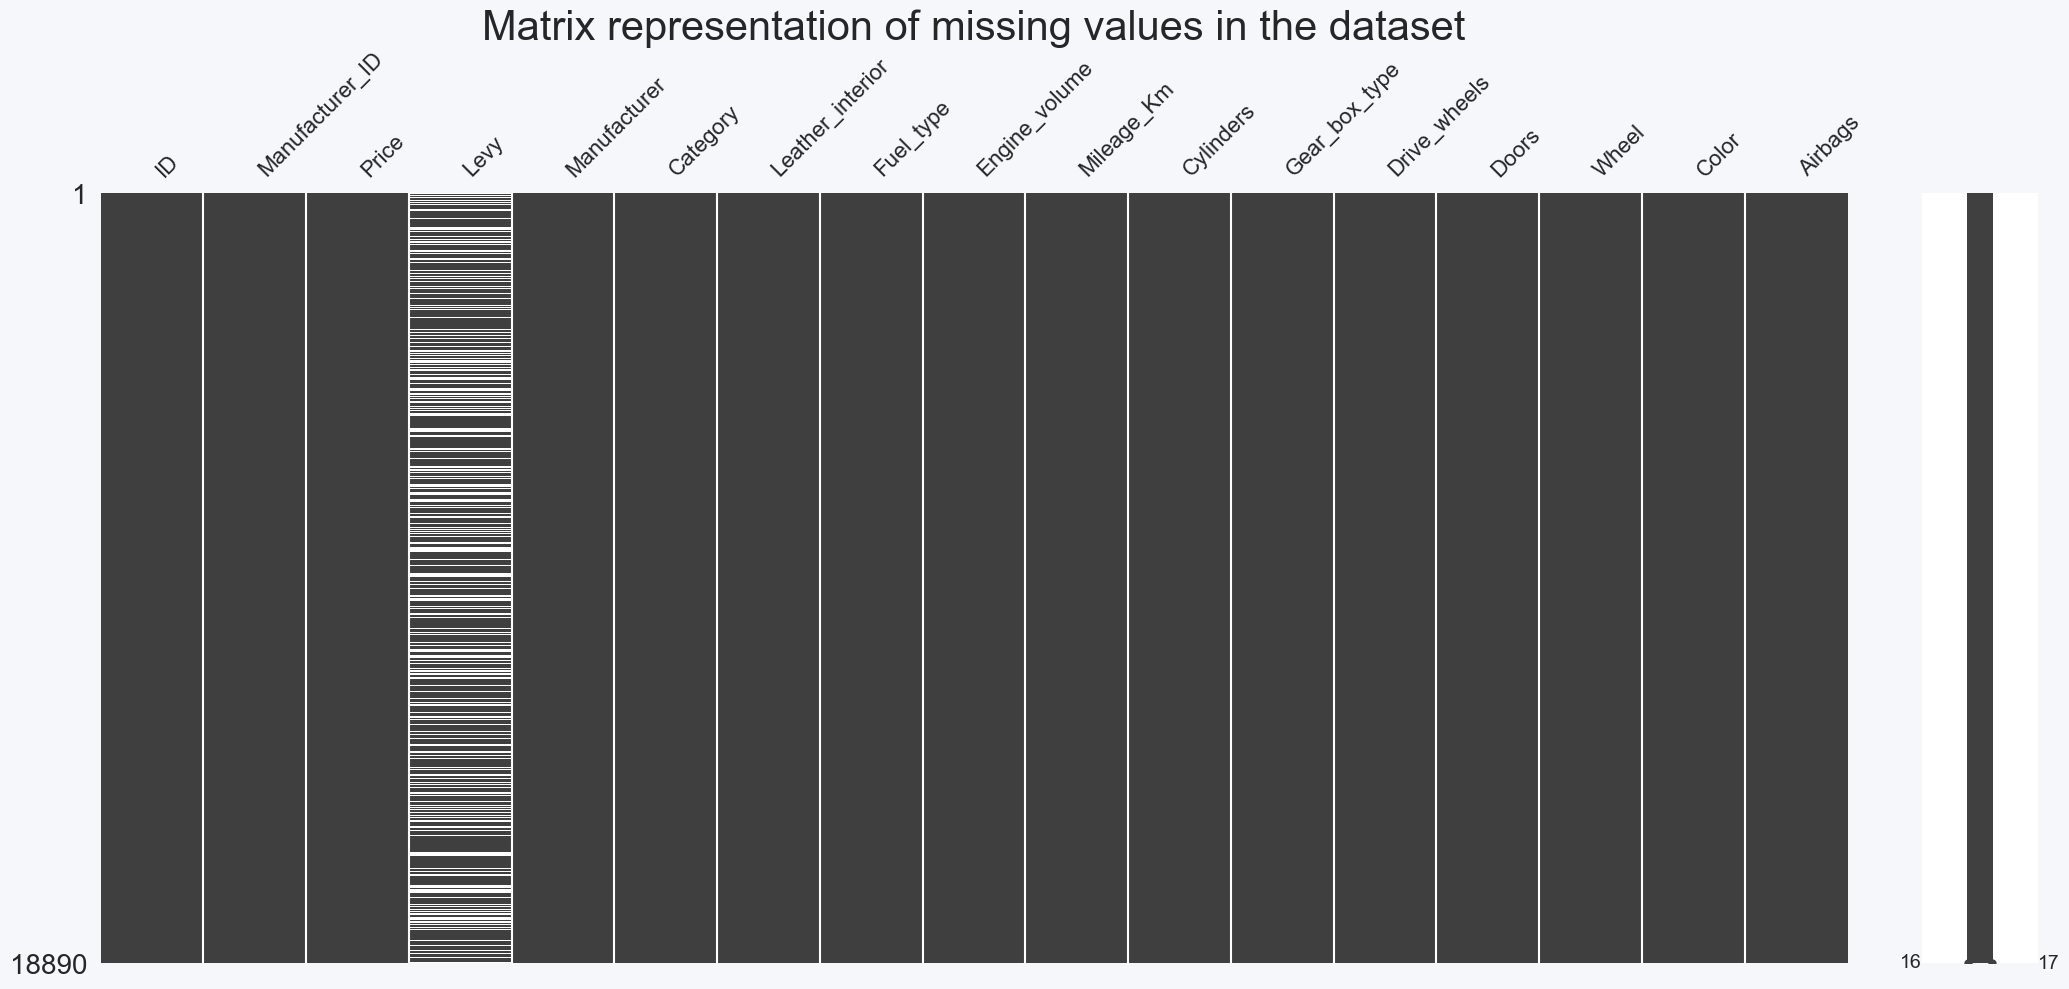

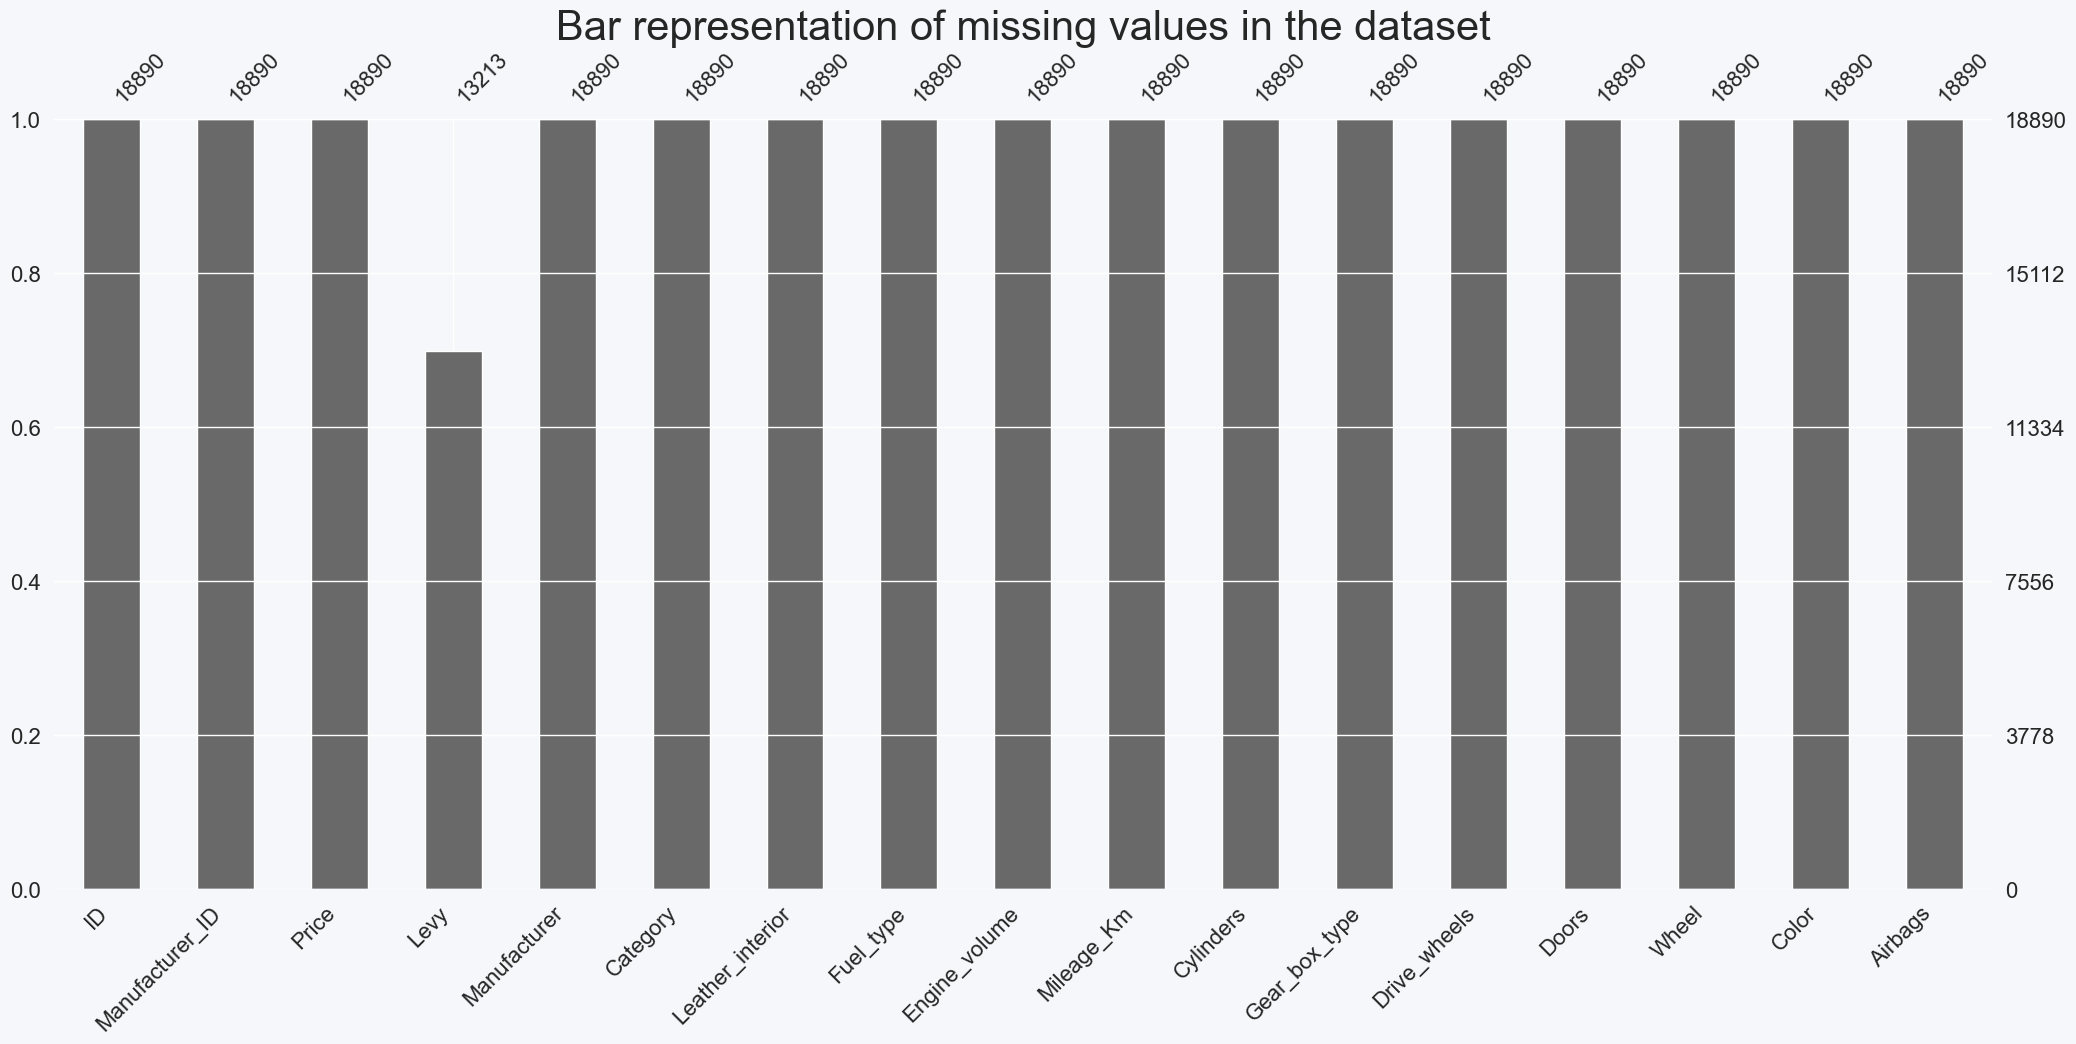

In [35]:
# Visual representation of missing values with missingno
import missingno as msno

miss_num = df_nd['Levy'].isna().sum()
miss_perc = round(miss_num/len(df_nd['Levy'])*100,1)

print('Missing values (percent) in feature Levy: {}%'.format(miss_perc))

# matrix
plt.figure(figsize = (15,9))
msno.matrix(df_nd)
plt.title('Matrix representation of missing values in the dataset', fontsize = 30)
plt.show();

# bar
plt.figure(figsize = (15,9))
msno.bar(df_nd)
plt.title('Bar representation of missing values in the dataset', fontsize = 30)
plt.show();

<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

- I will apply **MICE** to the missing values in feature `Levy`, using the numeric features `Price`, `Cylinders` and `Airbags`
- Also, I will apply a **Sensitive Analysis** on the imputed values: Sensitivity analysis in the context of imputation involves assessing how variations in the imputation process impact the results of subsequent analyses.
</div>

<div style="background-color: rgba(86, 160, 211, 0.2); padding: 10px;"> <center>3. DATA EXPLORATION </center></div>


<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Checking the Target (Prices)
</div>

In [36]:
# Distribution of car prices:
df_nd['Price'].describe()

count    1.889000e+04
mean     1.860898e+04
std      1.923077e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.219700e+04
max      2.630750e+07
Name: Price, dtype: float64

<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

- There is a big difference between the maximum price and the price value at the percentile 75 indicating a big spread of the data. At this point, suspected presence of outliers.

</div>

In [37]:
# Checking for the maximum price
df_nd.loc[df_nd.loc[:,'Price']== 26307500,:]

,ID,Manufacturer_ID,Price,Levy,Manufacturer,Category,Leather_interior,Fuel_type,Engine_volume,Mileage_Km,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
16983,45812886,7,26307500,NaN,opel,Goods wagon,No,Diesel,1.7,99999.0,4.0,Manual,Front,2-Door,Left_wheel,Blue,0


<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

- Opel is not a particularly expensive car.
- A very expensive car wouldnt use Diesel.
- A car with a Mileage of 99999 wouldnt cost that much.
- A car with no Airbags wouldnt cost that much.

**I will remove the row**

</div>

In [38]:
# Drop the row with the Price = 26307500

mask = df_nd.loc[:,'Price'] == 26307500

df_nd = df_nd.loc[~mask]

In [39]:
# Checking for the minimum price
df_nd.loc[df_nd.loc[:,'Price']== 1,:]

,ID,Manufacturer_ID,Price,Levy,Manufacturer,Category,Leather_interior,Fuel_type,Engine_volume,Mileage_Km,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
7815,45765530,7,1,NaN,opel,Sedan,Yes,Petrol,1.6,122231.0,4.0,Manual,Front,4-Door,Left_wheel,Silver,4
16992,45772201,1,1,1202.0,chevrolet,Hatchback,No,Petrol,1.6,200000.0,4.0,Manual,Front,4-Door,Left_wheel,Black,2


<div style="background-color:   rgba(228, 0, 43, 0.1); padding: 10px;">

- What car would cost 1 unit? Even more: what car would cost less than 1000 units?

**I will remove the rows with prices below 1000** - <font color=red> (NO)</font>

</div>

In [40]:
# # Drop the rows with the Price = 1
#
# mask = df_nd.loc[:, 'Price'] < 1000
#
# df_nd = df_nd.loc[~mask]

In [41]:
df_nd['Price'].describe(percentiles = [0.25, 0.50, 0.75, 0.85, 0.90, 1])

count     18889.000000
mean      17217.224628
std       19813.629789
min           1.000000
25%        5331.000000
50%       13172.000000
75%       22197.000000
85%       30734.000000
90%       38742.000000
100%     872946.000000
max      872946.000000
Name: Price, dtype: float64

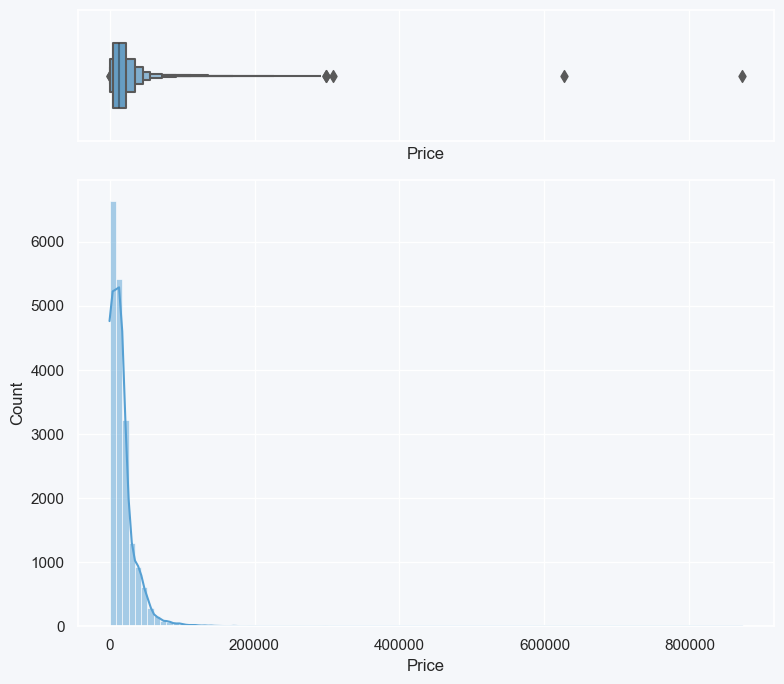

In [42]:
# Density Plot

fig, ax = plt.subplots(nrows = 2,
                       ncols = 1,
                       sharex = 'col',
                       figsize = (8,7),
                       gridspec_kw={"height_ratios": (.25, .85)})

sns.boxenplot(data = df_nd,
            x = 'Price',
            color = '#56a0d3',
            width=0.5,
            ax = ax[0],
            orient = 'h')

sns.histplot(df_nd,
             x = 'Price',
             bins = 100,
             kde = True,
             color = '#56a0d3',
             ax = ax[1])

plt.tight_layout()
plt.show();

<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

- **There are outliers**.
- The plot seems to be right-skewed, meaning that most prices are rather medium-low (below 20000), leading to:
    - Mean > Median, highlighting that the difference between the mean and the median is big.
- The data points are spread out far from the mean, which indicates a high variability in the prices (90% of the prices are below 40769 and the remaining 10% are between 40769 and 872946)

</div>

<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Categorical features

- Manufacturer
- Category
- Leather-interior
- Fuel-type
- Gear-box-type
- Drive-wheels
- Doors
- Wheel
- Color

</div>

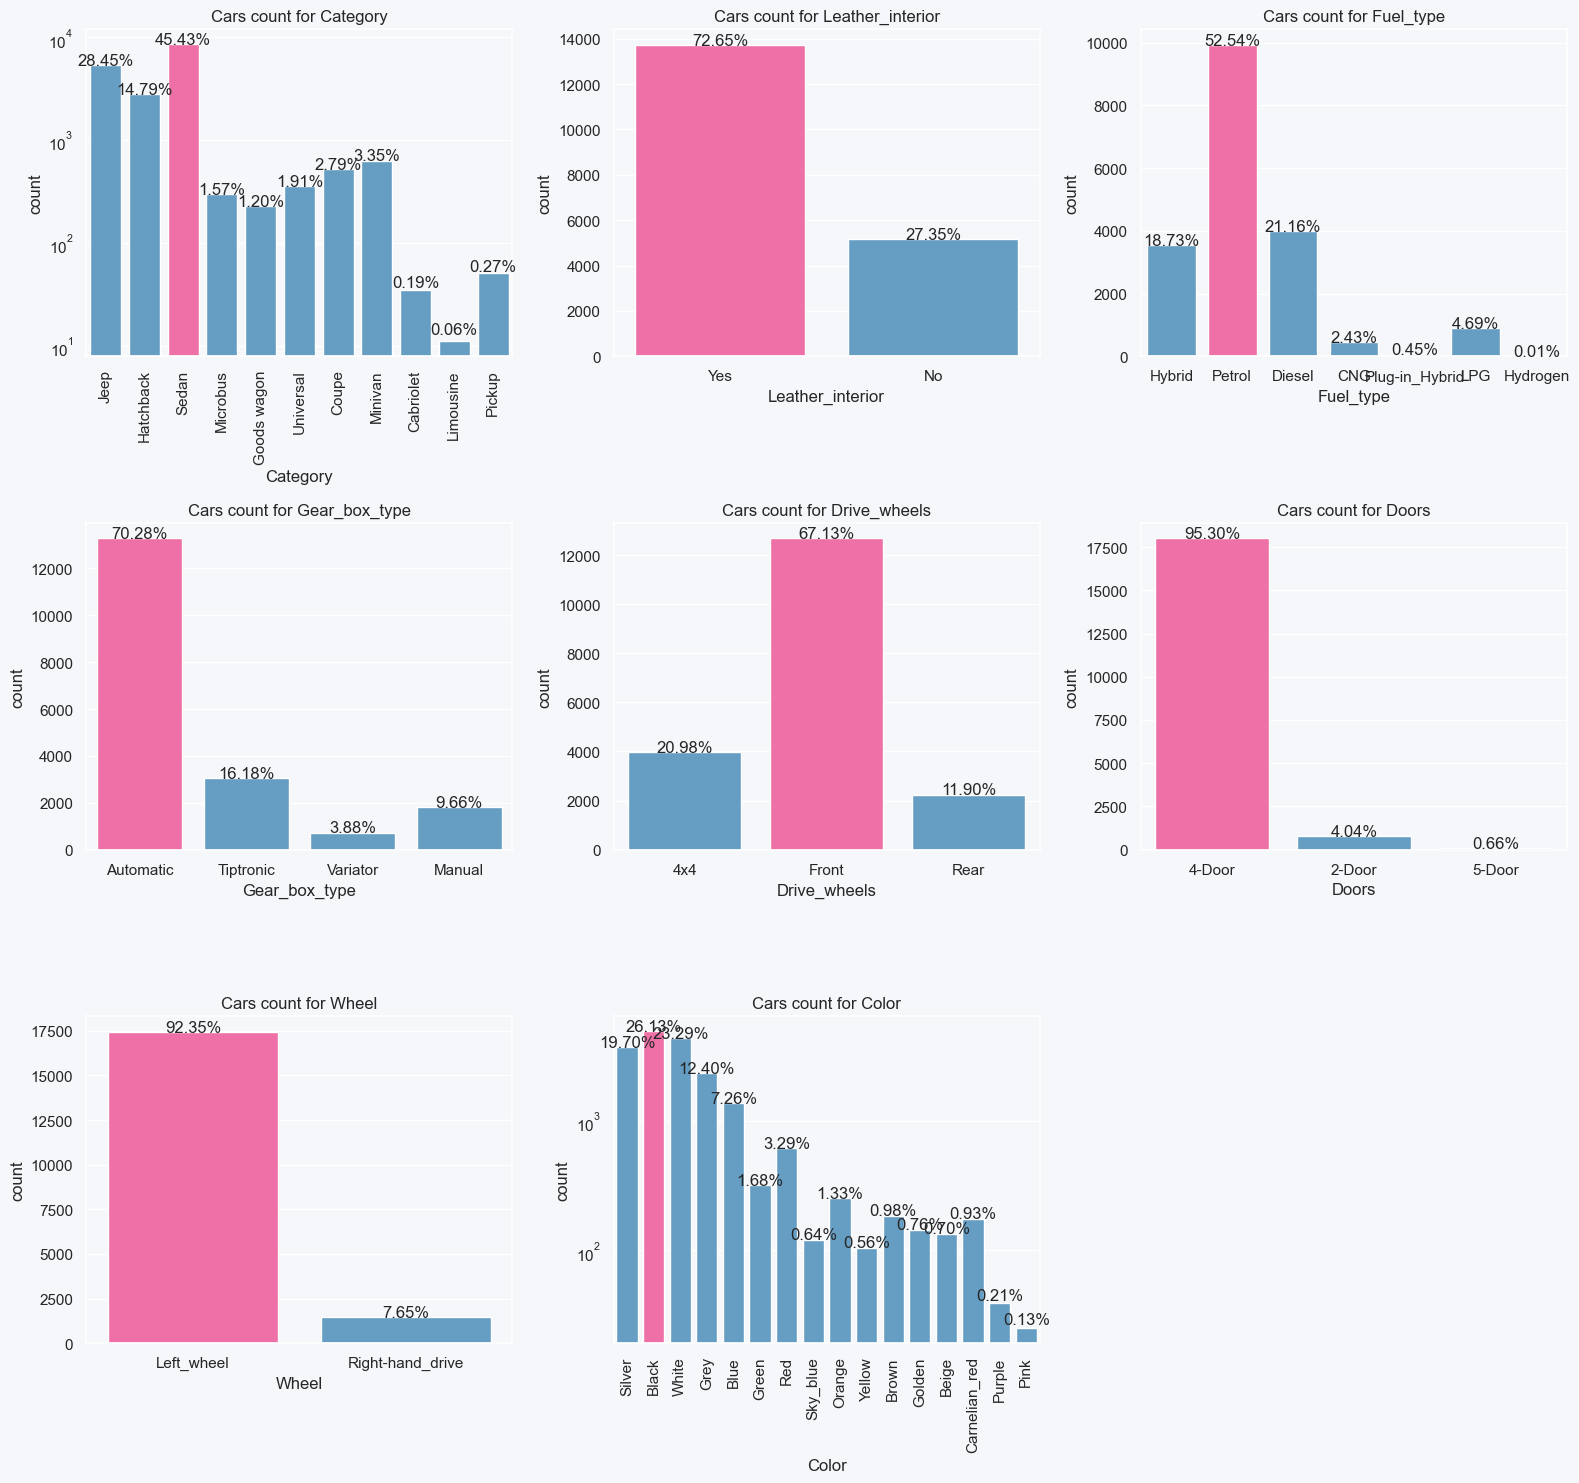

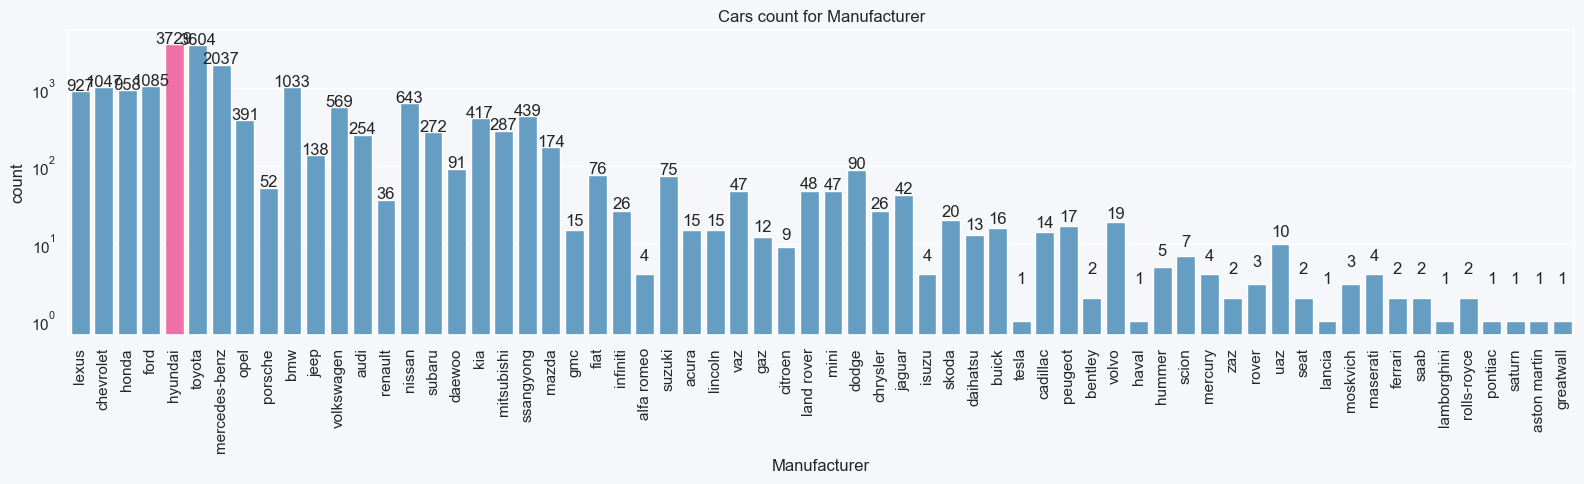

In [43]:
# Checking for the distributions of categorical features

cols_cat = [col for col in df_nd.columns if df_nd[col].dtype == 'object' and col not in ['Manufacturer']]

plt.figure(figsize = (16,15))

for i, col in enumerate(cols_cat):
    plt.subplot(3, 3, i+1)
    plt.gca().set_title('Cars count for {}'.format(col))

    counts = sns.countplot(data = df_nd,
                           x = col,
                           color = '#56a0d3')

    if col in ['Category', 'Fuel-type', 'Gear-box-type', 'Color']:
        plt.gca().set_yscale('log')
        counts.set_xticklabels(counts.get_xticklabels(), rotation=90)

    #   Placing the count (high of the bar) at each bar in the barplot
    for i, patch in enumerate(counts.patches):
        counts.annotate('{:.2f}%'.format(100* patch.get_height() / len(df_nd)),
                        (patch.get_x() + patch.get_width() / 2, patch.get_height() + 2),
                        ha = 'center')

# Highlight the bar the maximum count of reservations
    patch_c = [patch.get_height() for patch in counts.patches]    # <--------- list with the hights of the bars
    idx_tallest = np.argmax(patch_c)                              # <--------- get the index of the tallest bar
    counts.patches[idx_tallest].set_facecolor('#ee70a6')          # <--------- modify the color of the tallest bar


plt.tight_layout()     # <------------- Adjust subplot spacing
plt.show;

plt.figure(figsize=(16, 5))

for i, col in enumerate(['Manufacturer']):
    plt.subplot(1, 1, i+1)
    plt.gca().set_title('Cars count for {}'.format(col))
    counts = sns.countplot(data = df_nd,
                           x = col,
                           color = '#56a0d3')

    if col in ['Manufacturer']:
        plt.gca().set_yscale('log')
        counts.set_xticklabels(counts.get_xticklabels(), rotation=90)
#   Placing the count (high of the bar) at each bar in the barplot
    for i, patch in enumerate(counts.patches):
        counts.annotate('{}'.format(int(patch.get_height())),
                        (patch.get_x() + patch.get_width() / 2, patch.get_height() + 2),
                        ha = 'center')

    # Highlight the bar the maximum count of reservations
    patch_c = [patch.get_height() for patch in counts.patches]
    idx_tallest = np.argmax(patch_c)
    counts.patches[idx_tallest].set_facecolor('#ee70a6')

plt.tight_layout()     # <------------- Adjust subplot spacing
plt.show;

<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

- **Sedan** seems to be a favored car category, and **Hyundai** seems to be a favored car Manufacturer.
- **Petrol**(52.06%) is the most common type of fuel system. Petrol cars surpases the double of the Diesel cars. *Very small frequency for fuel types: LPG, CNG, Plug-in Hybrid and Hydrogen.<font color='#00a98f'> Collapse them into one category?</font>*.
- Most of cars (95.30%) are a **4-Doors cars**. *<font color='#00a98f'> Collapse 2-Doors and 5 or above doors cars into one category?</font>*.
- **Left_wheel** cars seems to be favored with 92.35% of the cars having this type of Wheel. <font color=red>Too few data points for Right-hand_drive that can lead to problems when using to make an inference </font>.
- **Black** followed by **Silver** and **White** cars are the most common to find in the dataset.
- Most of the cars are **Automatic** (70.28%).

</div>

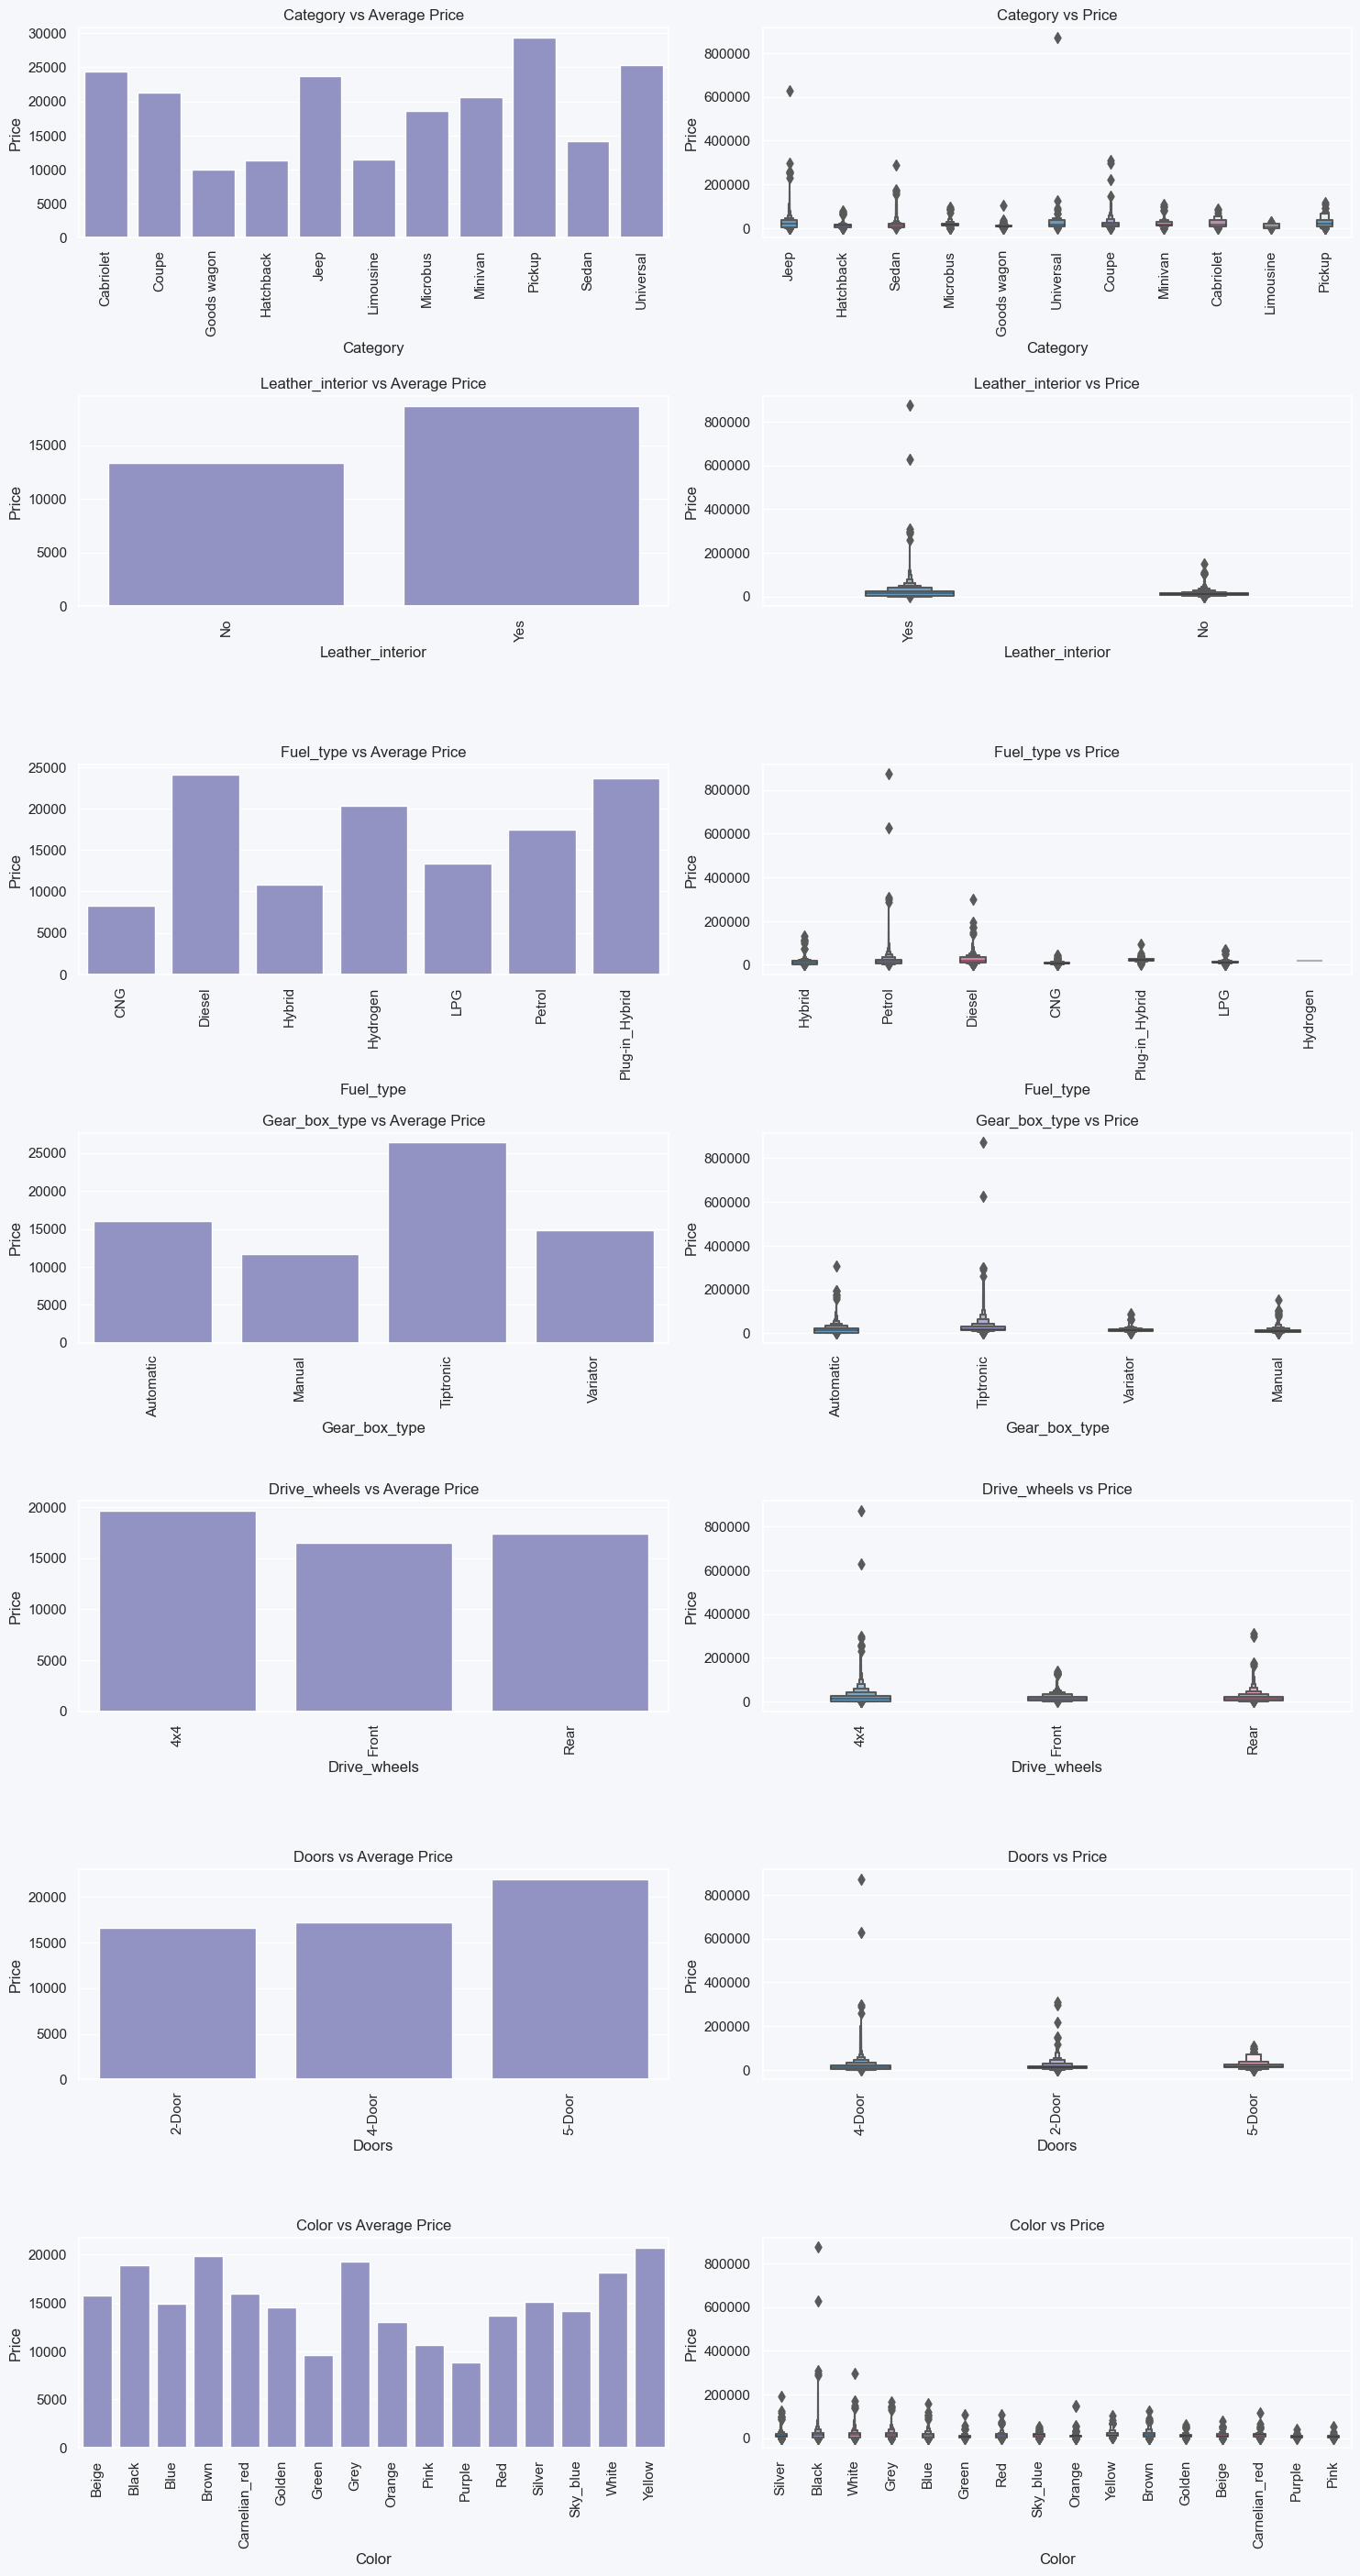

In [44]:
def plot_catavgprice(x,fig,df_nd):

    plt.subplot(9,2,fig)

    plt.title(x+' vs Average Price')

    df_gb = df_nd.groupby(x)['Price'].mean()
    sns.barplot(x=df_gb.index,
                y=df_gb,
                color='#8a8acb')
    plt.xticks(rotation=90)

    plt.subplot(9,2,(fig+1))


    plt.title(x+' vs Price')

    sns.boxenplot(x=df_nd[x],
              y=df_nd['Price'],
              data=df_nd,
              palette=palette,
              width=0.3)
    plt.xticks(rotation=90)

# -------------------------------------------------------------------

plt.figure(figsize=(15,35))

plot_catavgprice('Category', 1,df_nd)
plot_catavgprice('Leather_interior', 3,df_nd)
plot_catavgprice('Fuel_type', 5,df_nd)
plot_catavgprice('Gear_box_type', 7,df_nd)
plot_catavgprice('Drive_wheels', 9,df_nd)
plot_catavgprice('Doors', 11,df_nd)
plot_catavgprice('Color', 13, df_nd)

plt.tight_layout()



In [45]:
df_nd.loc[df_nd.loc[:,'Fuel_type']=='Hydrogen',:]


,ID,Manufacturer_ID,Price,Levy,Manufacturer,Category,Leather_interior,Fuel_type,Engine_volume,Mileage_Km,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
12900,45784073,4,20385,NaN,hyundai,Sedan,Yes,Hydrogen,2.4,116800.0,6.0,Tiptronic,Front,4-Door,Left_wheel,Grey,8


<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

- **Pickup** has the highest price in average. **Goods wagon** has the lowest price in average.
- **Cars with leather interior** has the highest price in average, as expected.
- **Triptonic** system seems to have the highest average price (a 10000 difference with the next gear box type), although it contains outliers that it may affect the mean value.
- **Diesel** has the highest average price but with a very small difference with the **Plug-in Hybrid**. There are (at least) two Petrol cars with a very high price (outliers?). There is only one car usign **Hydrogen**.
- **4x4** wheel technology seems to have the highest average price, although it contains outliers that affect the mean value. There is no notable difference of price between the Front and Rear wheels technologies.
- **5-Door** cars seem to have the highest average price. However, there are no big differences in the prices between the different types Doors.
- **Yellow**, followed by **Brown**, and **Grey** are the colors with the highest prices.
</div>

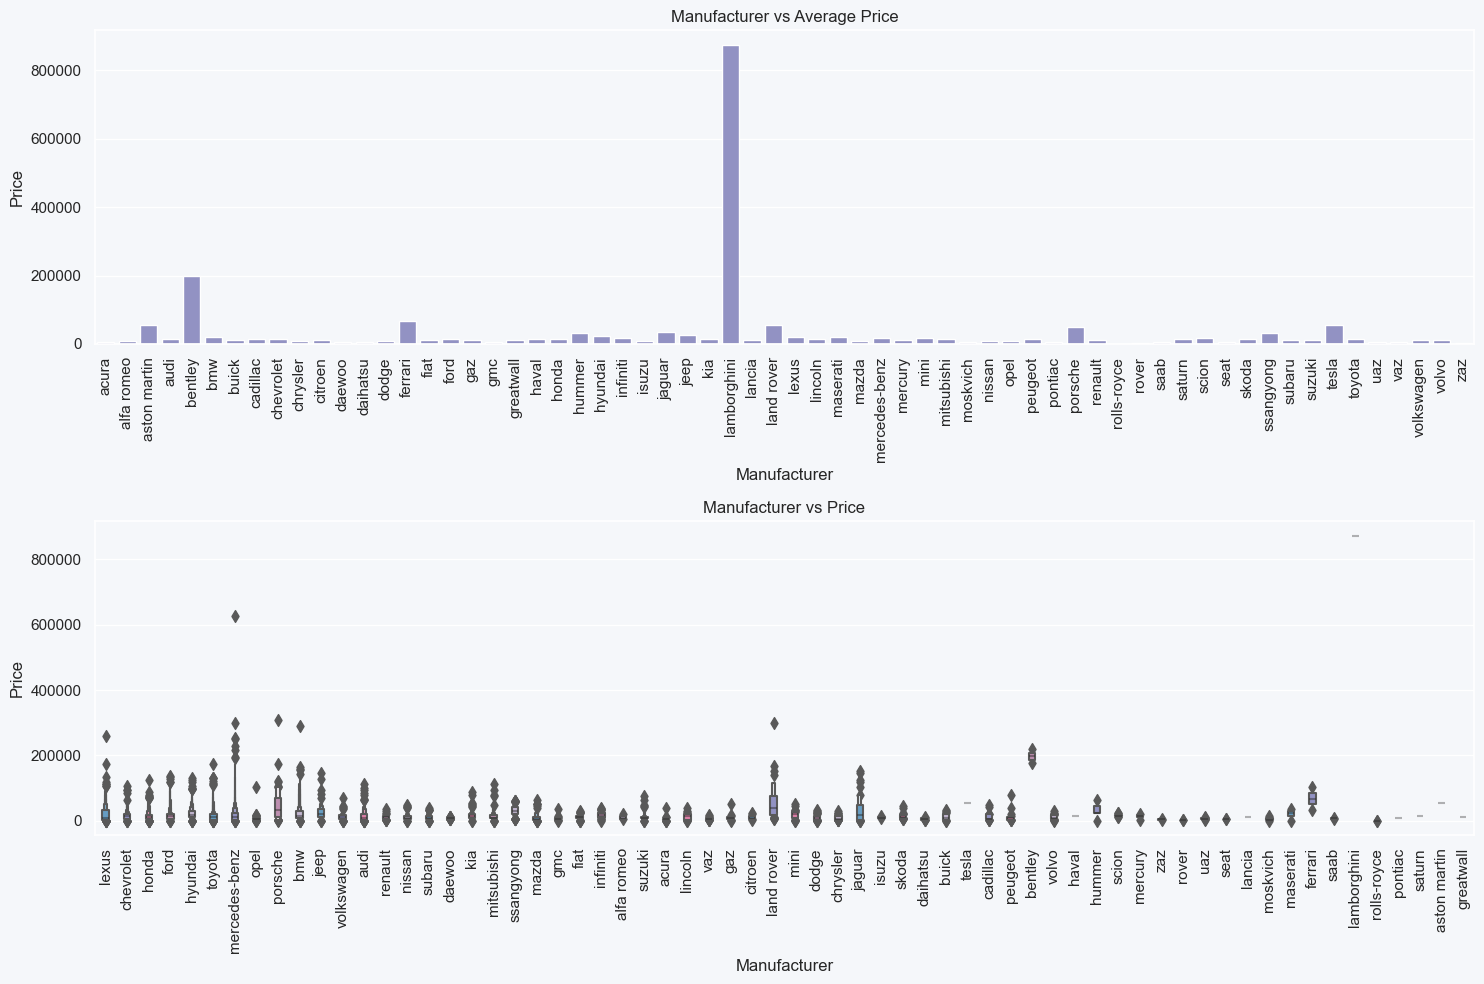

In [46]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
df_gb = df_nd.groupby('Manufacturer')['Price'].mean()

plt.title('Manufacturer vs Average Price')
sns.barplot(x=df_gb.index,
            y=df_gb,
            color='#8a8acb')
plt.xticks(rotation=90)

plt.subplot(2,1,2)
plt.title('Manufacturer vs Price')
sns.boxenplot(x=df_nd['Manufacturer'],
          y=df_nd['Price'],
          data=df_nd,
          palette=palette,
          width=0.3)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

- There is only one **lamborghini**, one **tesla**, one **aston martin** in the dataset with a high price, so its average price is not representative (Outliers?)
- There are only two **bentley**, two **ferrari**, so its average price is also not representative.
- Thus, **Land Rover**, **Porsche** and **Tesla** seem to be the cars with the highest average prices in the dataset.

</div>

<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Numerical features
- Levy
- Engine_volume
- Mileage_km
- Cylinders
- Airbags

</div>

In [47]:
cols_num = ['Levy', 'Engine_volume', 'Mileage_Km', 'Cylinders', 'Airbags']

In [48]:
df_nd['Mileage_Km'] = df_nd['Mileage_Km'].astype('float')

In [49]:
df_nd[cols_num].describe()

,Levy,Engine_volume,Mileage_Km,Cylinders,Airbags
count,13213.000000,18889.000000,1.888900e+04,18889.000000,18889.000000
mean,906.169681,2.307845,1.455109e+05,4.580444,6.572873
std,463.203417,0.877971,1.783379e+05,1.200734,4.321988
min,87.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,640.000000,1.800000,7.006600e+04,4.000000,4.000000
50%,781.000000,2.000000,1.260380e+05,4.000000,6.000000
75%,1058.000000,2.500000,1.888000e+05,4.000000,12.000000
max,11714.000000,20.000000,7.789999e+06,16.000000,16.000000


**Distribution of Numerical variables:**

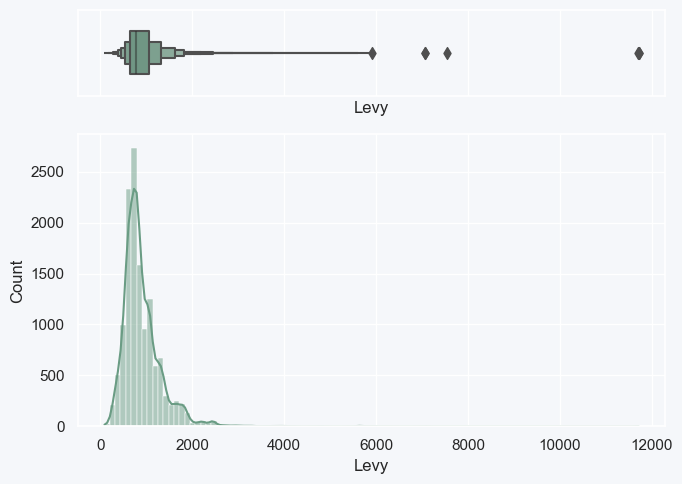

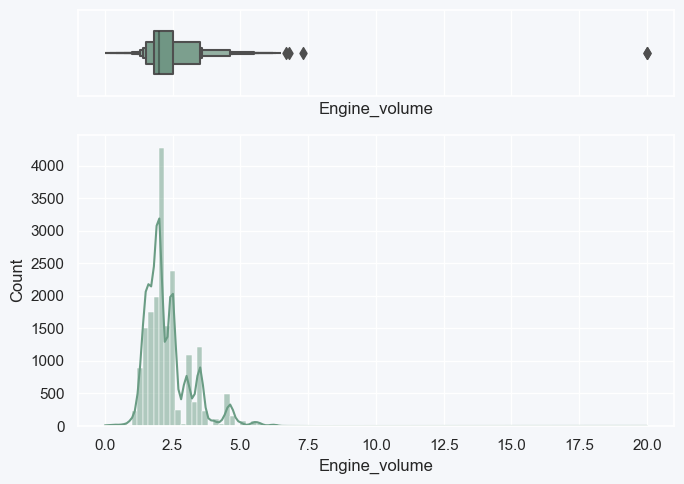

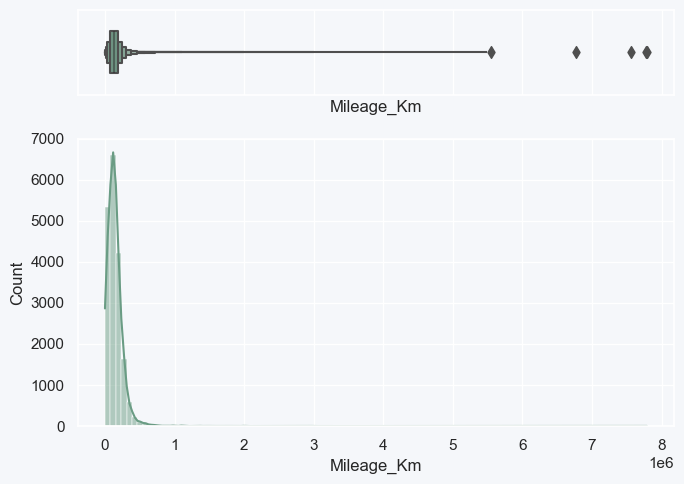

In [50]:
def plot_num(df,x):

    # Density Plot
    fig, ax = plt.subplots(nrows = 2,
                           ncols = 1,
                           sharex = 'col',
                           figsize = (7,5),
                           gridspec_kw={"height_ratios": (.25, .85)})

    sns.boxenplot(data = df,
                x = x,
                color = "#6a9c84",
                width=0.5,
                ax = ax[0],
                orient = 'h')

    sns.histplot(df,
                 x = x,
                 bins = 100,
                 kde = True,
                 color = "#6a9c84",
                 ax = ax[1]);

    plt.tight_layout()
    plt.show()

# ----------------------------------------------------------------------
for col in ['Levy', 'Engine_volume', 'Mileage_Km']:
    plot_num(df_nd, col)


<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

**Levy**, **Engine_volume** and **Mileage_Km** seem to be right-skewed and have outliers.

</div>

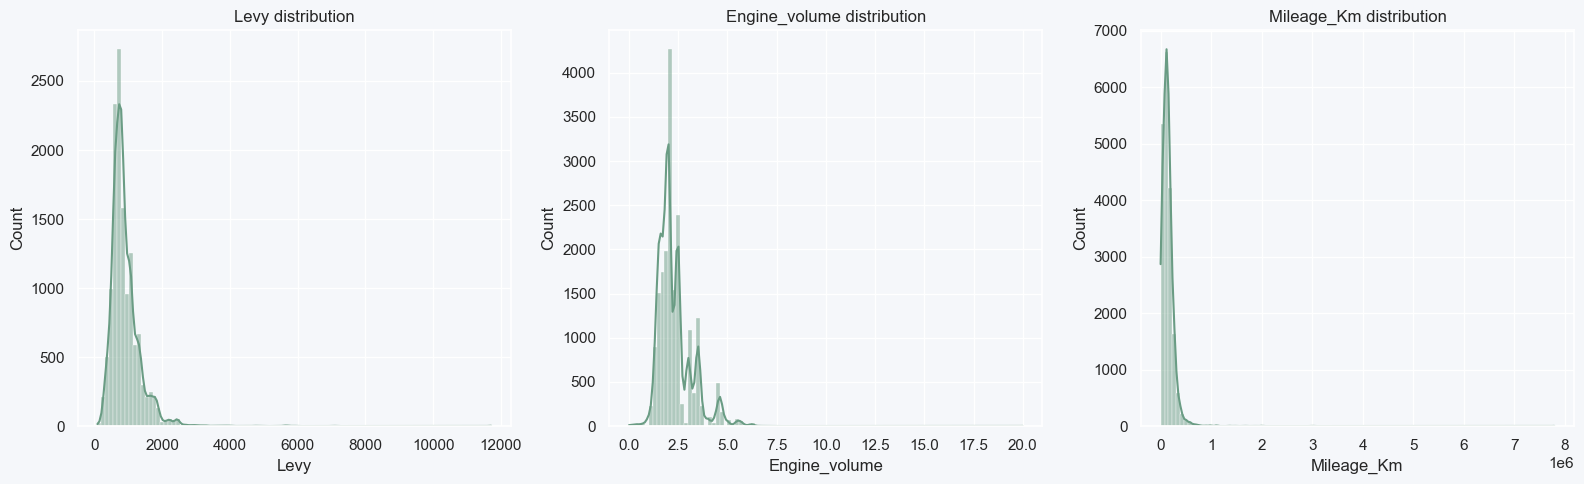

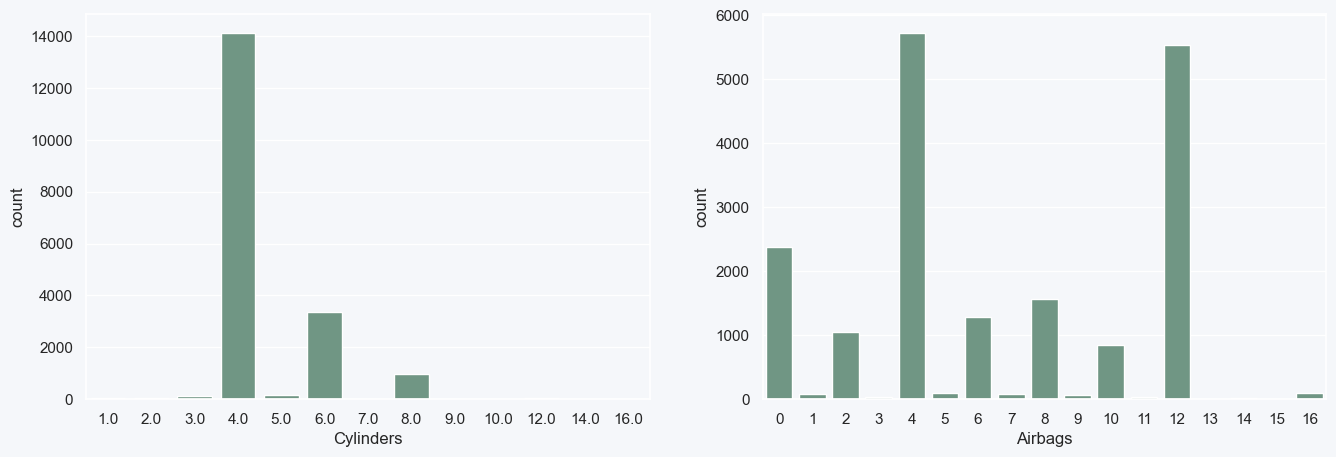

In [51]:
# numerical columns excluding 'price'
cols_num1 = [col for col in df_nd.columns if df_nd[col].dtype != 'object' and col not in ['ID', 'Manufacturer_ID', 'Price', 'Cylinders','Airbags']]

cols_num2 = ['Cylinders','Airbags']

plt.figure(figsize = (16,5))

for i, col in enumerate(cols_num1):
    plt.subplot(1, 3, i+1)
    plt.gca().set_title('{} distribution'.format(col))
    # plt.gca().set_yscale('log')
    hist = sns.histplot(df_nd,
                        x = col,
                        color = "#6a9c84",
                        bins = 100,
                        kde = True)

plt.tight_layout()     # <------------- Adjust subplot spacing
plt.show;

# ------------------------------------------------------------------------

plt.figure(figsize = [16,5])

for i, col in enumerate(cols_num2):

    plt.subplot(1, 2, i+1)

    count = sns.countplot(data = df_nd,
                          x = col,
                          color = "#6a9c84")

plt.show;

<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Correlation of numerical features to the prices

</div>

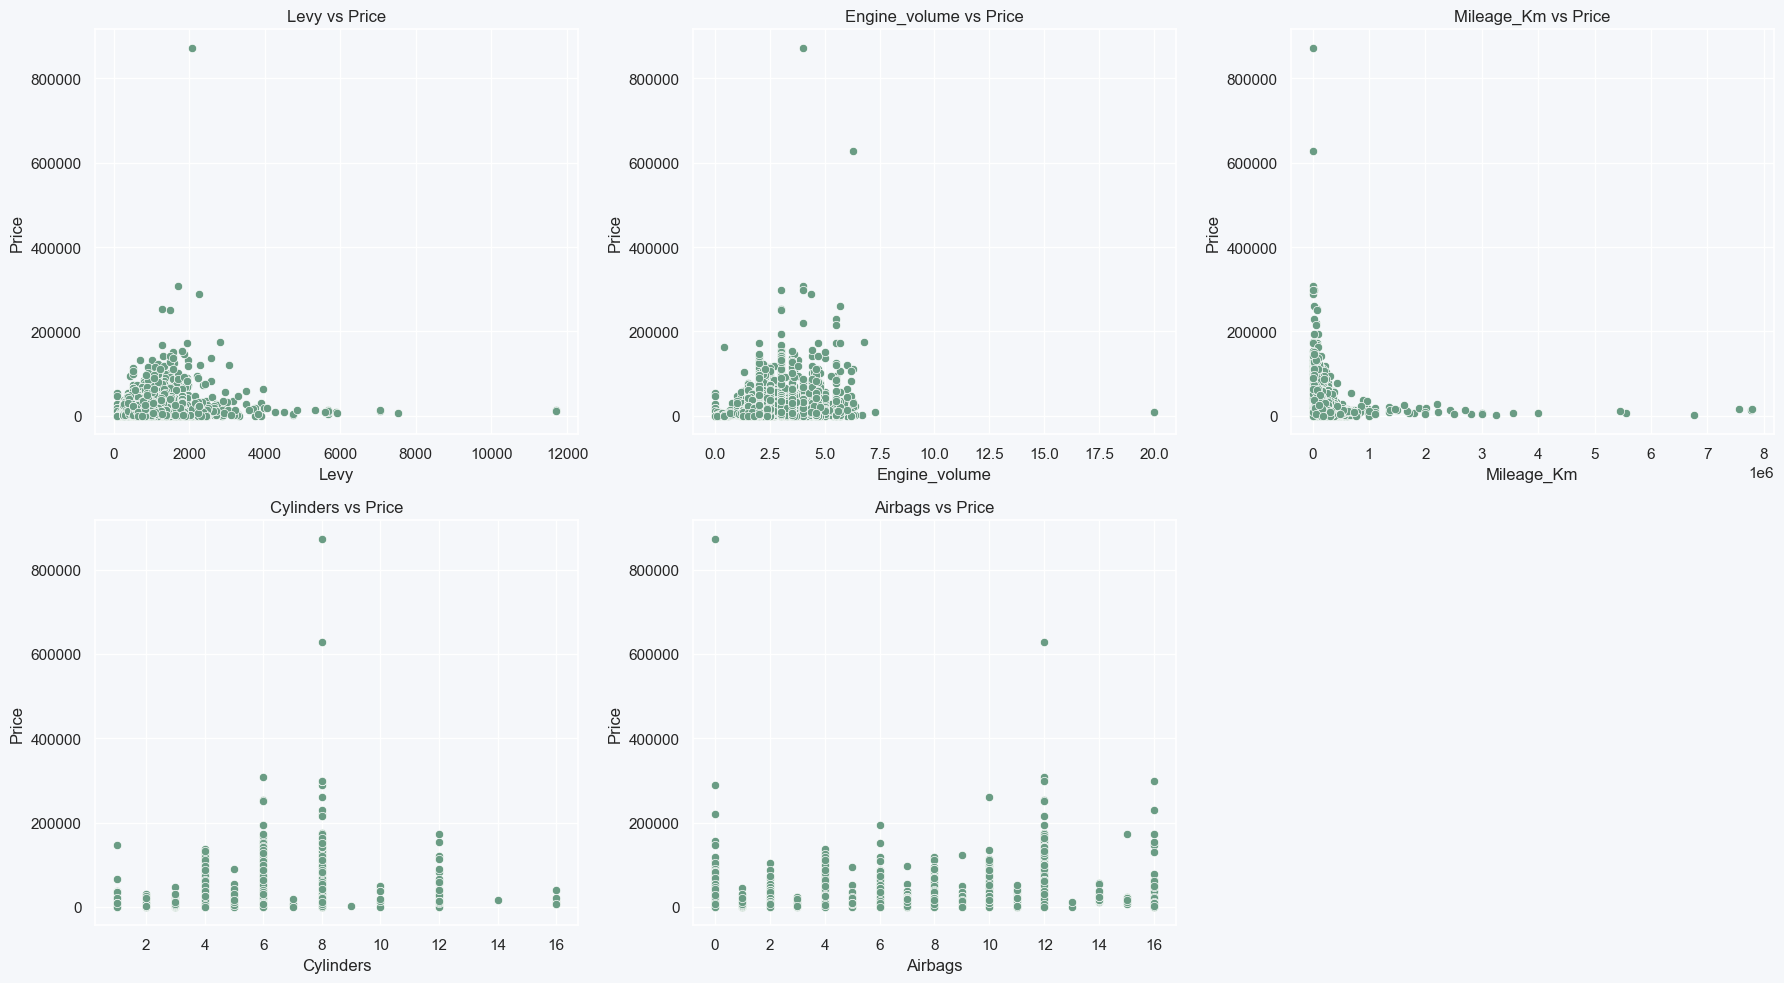

In [52]:
plt.figure(figsize = (18,10))

for i, col in enumerate(cols_num):
    plt.subplot(2, 3, i+1)
    plt.gca().set_title('{} vs Price'.format(col))

    sns.scatterplot(x = df_nd[col],
                    y = df_nd['Price'],
                    color = "#6a9c84")

plt.tight_layout()     # <------------- Adjust subplot spacing
plt.show()

<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

- The point in the top of the plot in Levy vs Price is quite far from the crowd and is not following any trend with respect the other observation. The same happen with the two point on top in the plots Engine_volume vs Price and Mileage_Km vs Price. Speculating about this points, I could say that these correspond to cars with extremely high price in the market <font color=red>(info about Cylinders and Engine_volume)</font>

</div>

**Pearson correlation analysis**

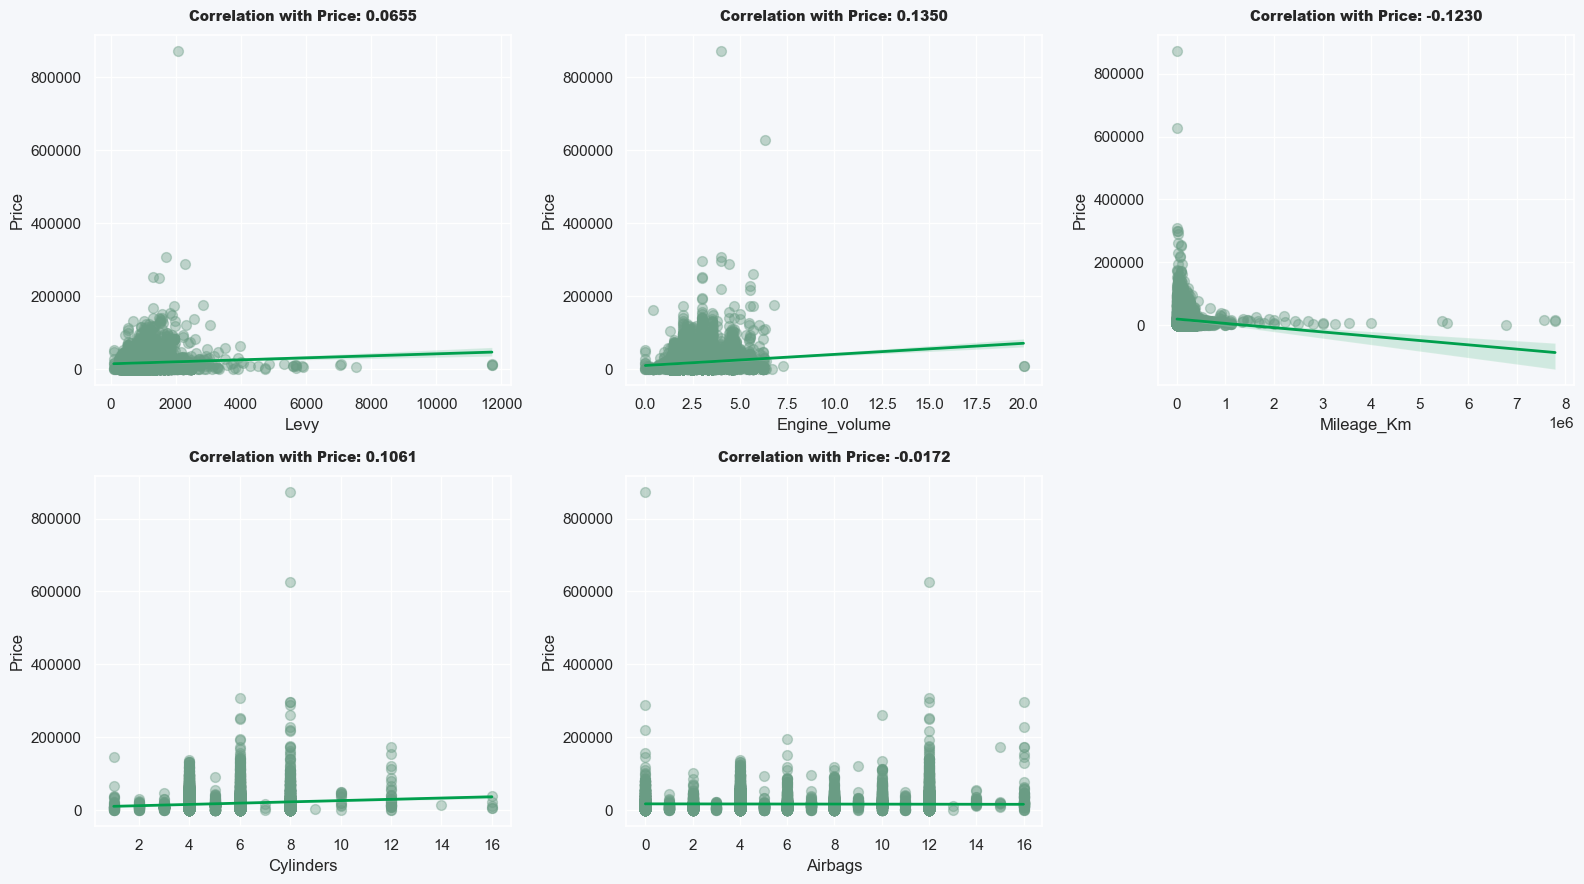

In [53]:
cols_num = ['Levy', 'Engine_volume', 'Mileage_Km', 'Cylinders', 'Airbags']

plt.figure(figsize = (16,9))

# Customize scatter plot points
scatter_kws = {'color': "#6a9c84", 'alpha': 0.4, 's': 50}

# Customize regression line
line_kws = {'color': "#009f4d", 'linewidth': 2}

for i, col in enumerate(cols_num):

    plt.subplot(2, 3, i+1)

    sns.regplot(x = col,
                y = 'Price',
                data = df_nd,
                scatter_kws=scatter_kws,
                line_kws=line_kws)

    # Title with the Pearson correlation coeff between col and Target
    plt.title('Correlation with Price: {:6.4f}'.format(df_nd[col].corr(df_nd['Price'])),fontweight="black",size=10,pad=10)

plt.tight_layout()     # <------------- Adjust subplot spacing
plt.show()

<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

**Very low correlation of all the numerical variables to Price**

</div>

**Spearman correlation analysis**: Suitable in the cases of Non-linear relationship among variables, presence of outliers and not skewed data, and Noisy Data.

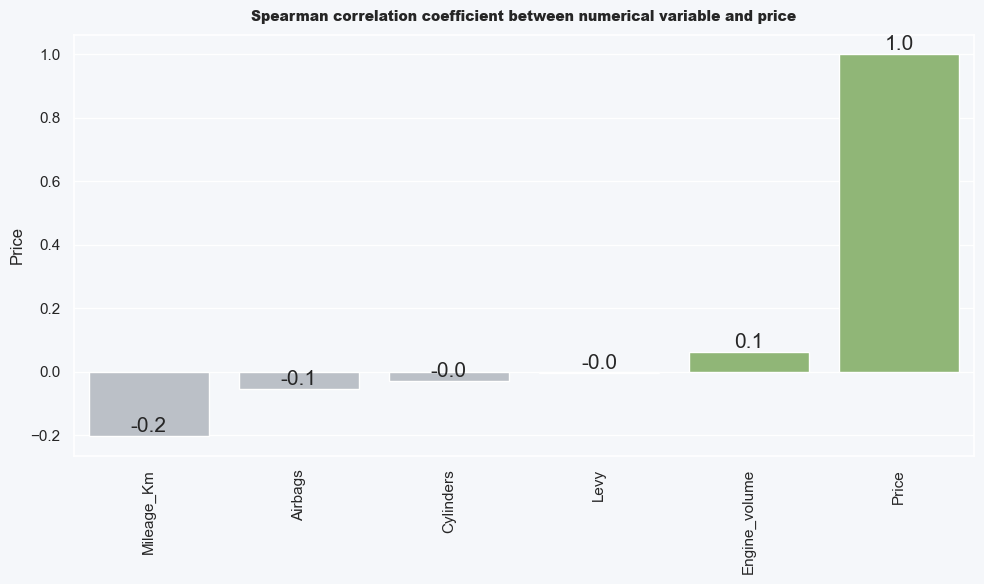

In [54]:
cols_num = cols_num + ['Price']

# Compute the Spearman correlation coefficient between each numerical variable and the target
corr =df_nd[cols_num].corr(method="spearman")['Price'].sort_values()

# Plot of the correlation coefficients
plt.figure(figsize=(10,6))

sns.barplot(x = corr.index,
            y = corr,
            palette=["#B9C0C9" if v < 0 else "#8ec06c" for v in corr])

# Place the Spearman coeff on top of each bar
for i, v in enumerate(corr):
    plt.text(i,
             v,
             f"{v:.1f}",
             ha="center",
             va="bottom",
             size=15)

plt.title('Spearman correlation coefficient between numerical variable and price',fontweight="black",size=10,pad=10)
plt.xticks(rotation=90)
plt.tight_layout()

<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

**Very low monotonic relation of all the numerical variables to Price**

</div>

<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Correlation

</div>

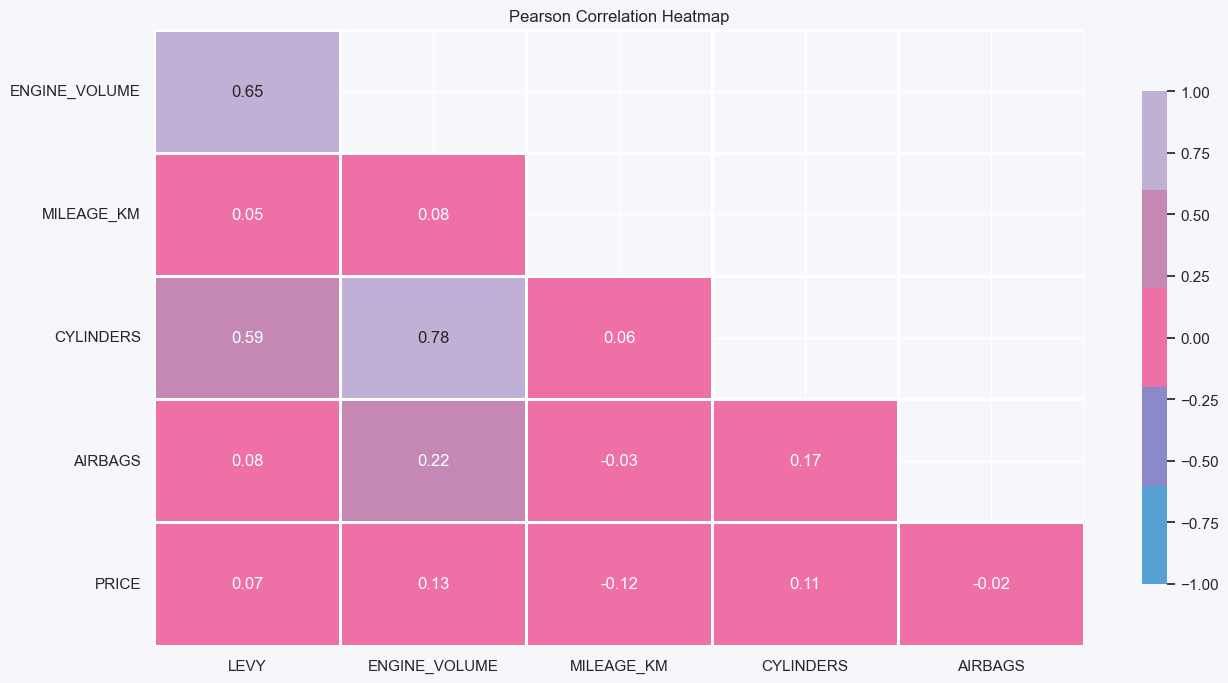

In [55]:
# Correlation Analysis

def corr_heatmap(df):

    cols_num = ['Levy', 'Engine_volume', 'Mileage_Km', 'Cylinders', 'Airbags', 'Price']

    # Compute correlation matrix
    mtx_corr = df[cols_num].corr()

    # Create correlation heatmap plot:
    plt.figure(figsize=(15, 8))

    # mask
    mask = np.triu(np.ones_like(mtx_corr, dtype=bool))

    # adjust mask and df
    mask = mask[1:, :-1]
    corr = mtx_corr.iloc[1:,:-1].copy()

    # plot heatmap
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
               linewidths=1, cmap=cmap, vmin=-1, vmax=1,
               cbar_kws={"shrink": .8})

    # customize ticks
    yticks = [i.upper() for i in corr.index]
    xticks = [i.upper() for i in corr.columns]

    plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
    plt.xticks(plt.xticks()[0], labels=xticks);

    plt.title('Pearson Correlation Heatmap')
    plt.show()

corr_heatmap(df_nd)

<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

- Strong correlation between **Engine_volume** and **Cylinders** and **Engine_volume** and **Levy**
- Middle correlation between **Cylinders** and **Levy**
</div>

<Figure size 1600x1600 with 0 Axes>

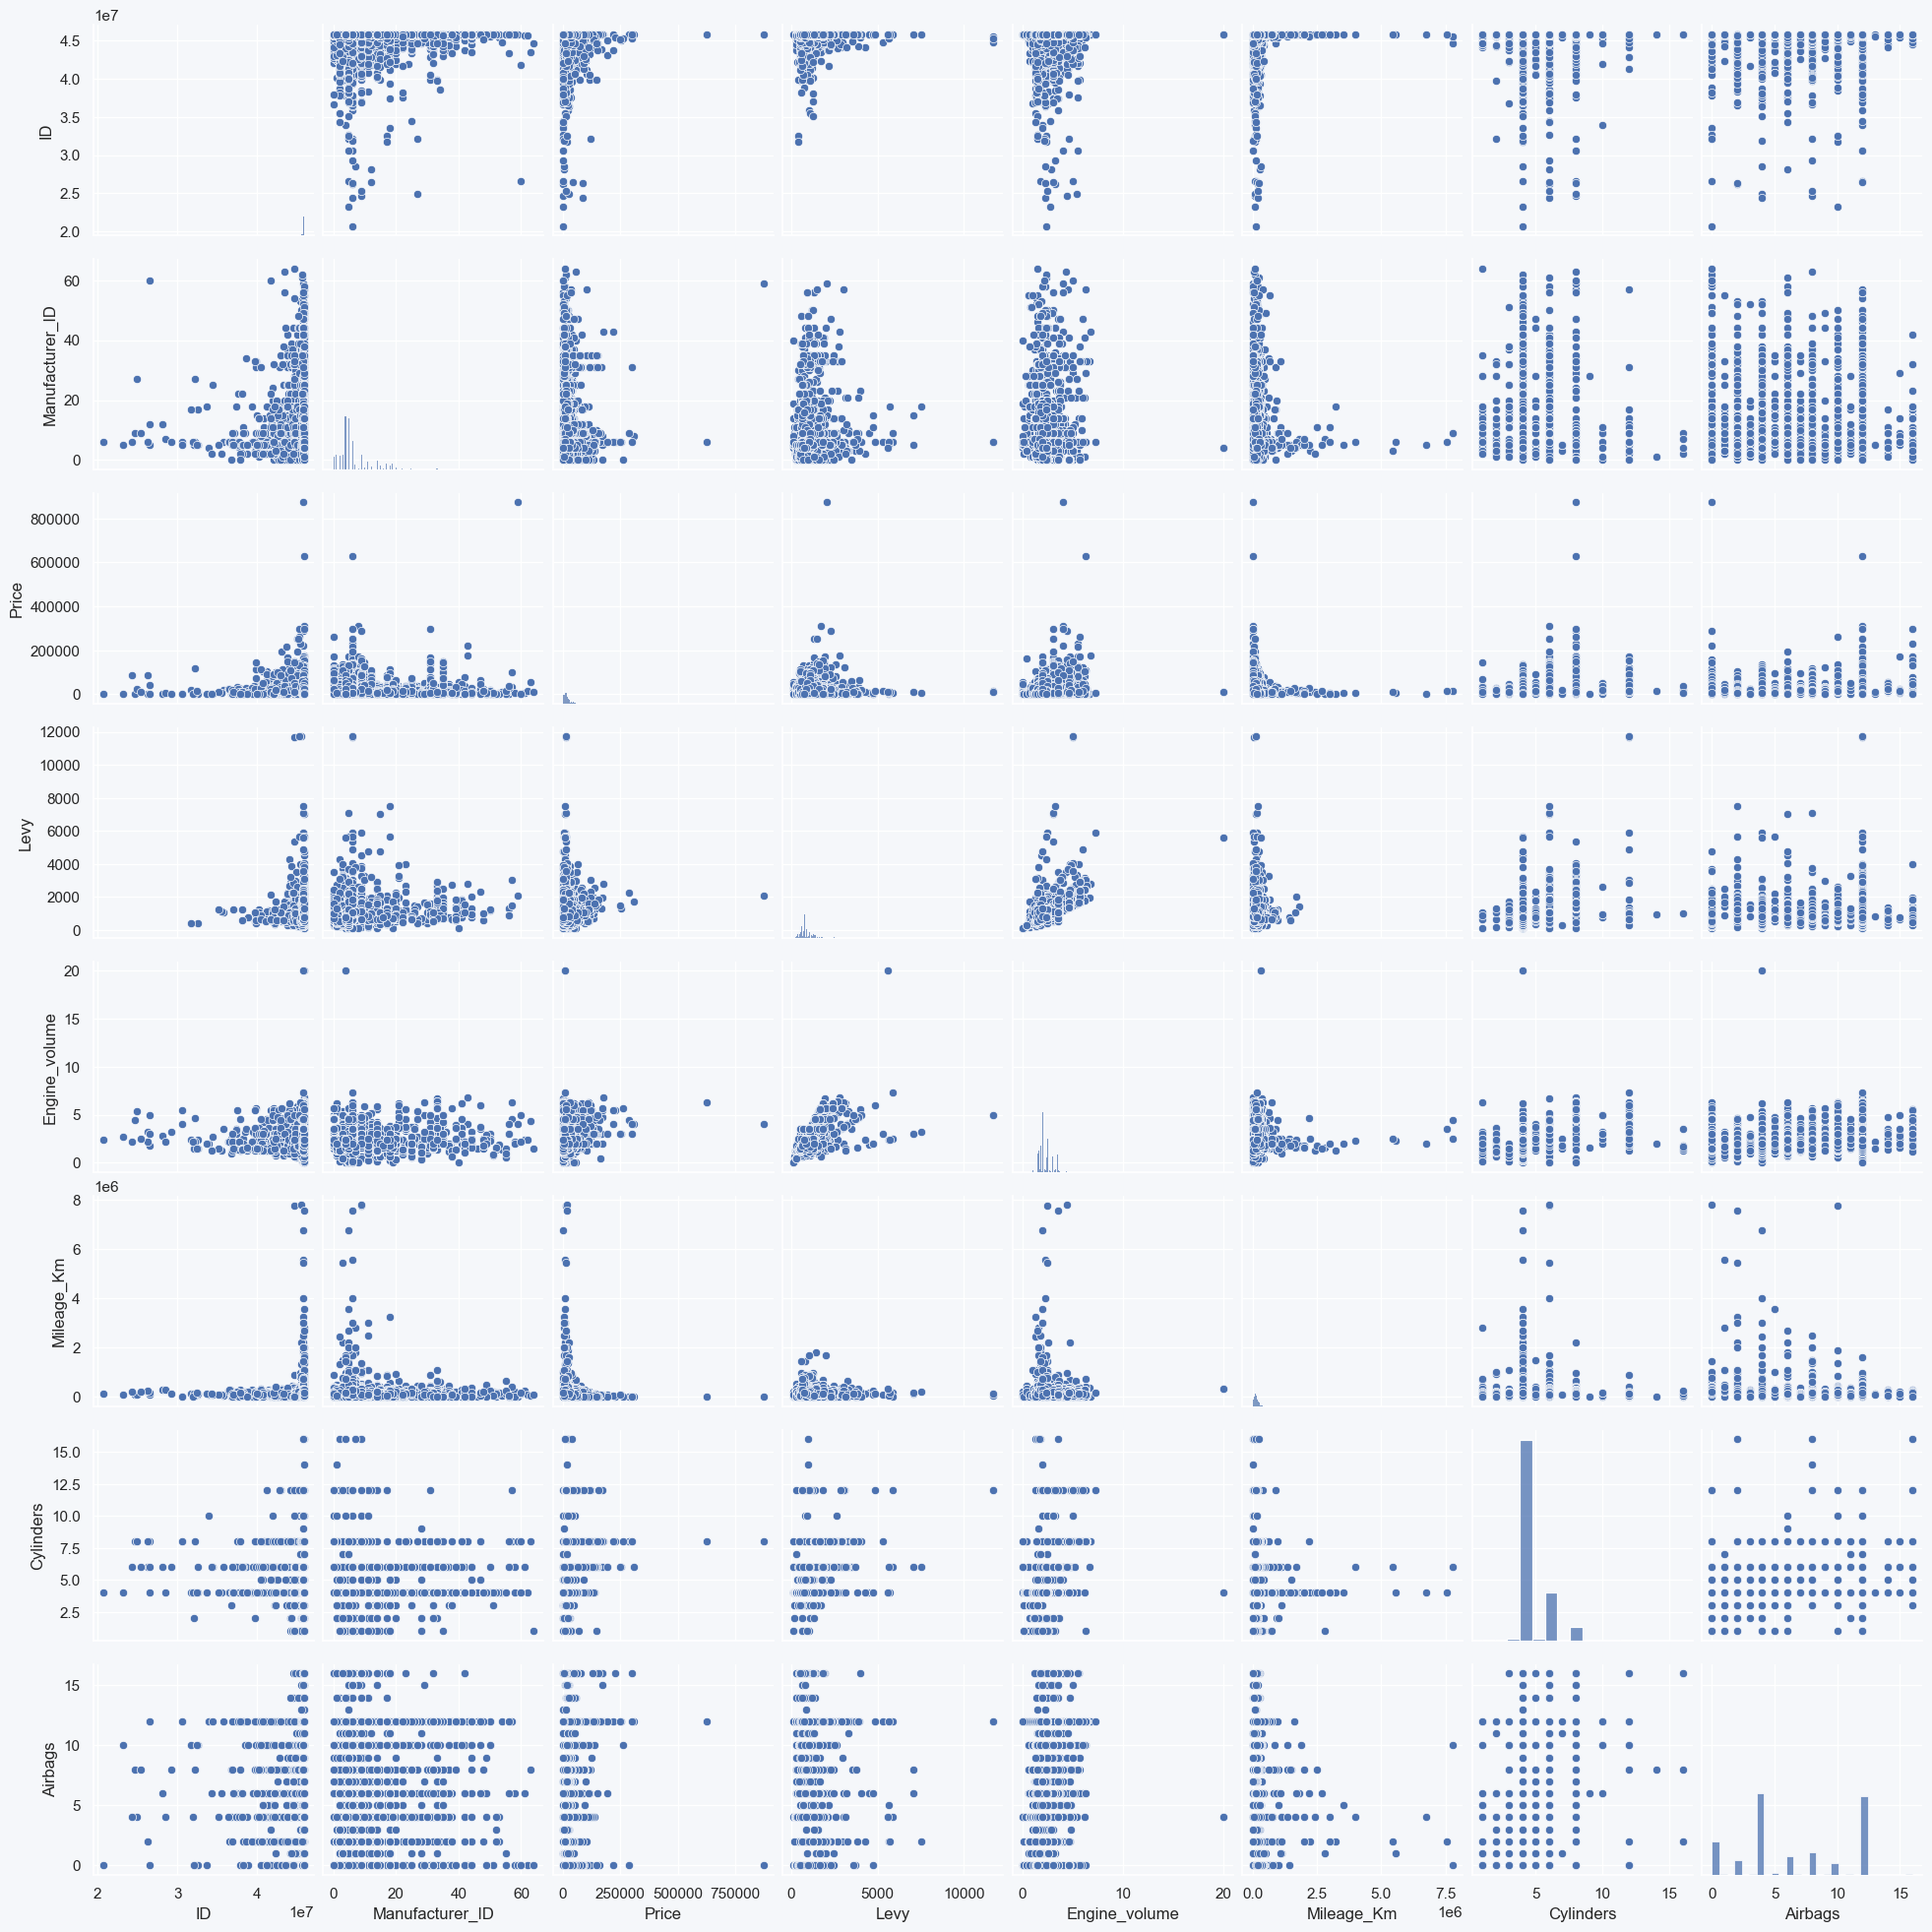

In [56]:
# Plot the Pairplot

plt.figure(figsize = [16,16])

sns.pairplot(df_nd,
             palette = palette)
plt.show()

<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

List of significant variables after visual analysis:

Due to not being able to create new features because of lack of information, I will include all features except 'Manufacturer ID' and 'ID'. I must have into account:
- Numerical features are not showing a high correlation with Price.
- There exist some collinearity between some numerical features.
- I will drop the outliers, since I dont have previous information about the potential client, goal or assumptions.
- The variable Levy contains missing values that I will impute using other numerical features.
</div>

In [57]:
df_nd.drop(['ID', 'Manufacturer_ID'], axis = 1, inplace = True)

df_nd.head()

,Price,Levy,Manufacturer,Category,Leather_interior,Fuel_type,Engine_volume,Mileage_Km,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,13328,1399.0,lexus,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4-Door,Left_wheel,Silver,12
1,16621,1018.0,chevrolet,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4-Door,Left_wheel,Black,8
2,8467,NaN,honda,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4-Door,Right-hand_drive,Black,2
3,3607,862.0,ford,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4-Door,Left_wheel,White,0
4,11726,446.0,honda,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4-Door,Left_wheel,Silver,4


<div style="background-color: rgba(86, 160, 211, 0.2); padding: 10px;"> <center>4. DATA CLEANING </center></div>

<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Dealing with Missing Values

</div>

In [58]:
# Applying MICE imputation to missing values in feature `Levy`
from fancyimpute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# select the numeric features
num_cols = cols_num + ['Price']

# Perform multiple imputation using MICE
mice_imp = IterativeImputer(random_state = 100,
                            max_iter = 10)
df_imputed = pd.DataFrame(mice_imp.fit_transform(df_nd[num_cols]),
                          columns=num_cols)

# -------------------------------------------------------------------------
# Perform a sensitivity analysis by repeating subsequent analysis multiple times
num_iterations = 10
mse_values = []

for _ in range(num_iterations):
    # Split the imputed data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(df_imputed.drop('Price', axis=1),
                                                        df_imputed['Price'],
                                                        test_size = 0.2,
                                                        random_state = 42)

    # Fit a linear regression model on the training set
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate the model on the test set (using MSE)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Display the sensitivity analysis results
print(f"Mean MSE across {num_iterations} iterations: {np.mean(mse_values)}")
print(f"Standard Deviation of MSE: {np.std(mse_values)}")


Mean MSE across 10 iterations: 299669474.59066045
Standard Deviation of MSE: 5.960464477539063e-08


<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

The results (mean and standard deviation of MSE) from the sensitivity analysis shows that the imputed data for column 'Levy' is stable and reliable.

</div>

In [59]:
# Reset the indices in both df_nd and df_imputed since there were rows previously eliminated in df_nd
df_nd = df_nd.reset_index(drop=True)
df_imputed = df_imputed.reset_index(drop=True)

# Create a copy of the dataset with the imputed values
df_clean = df_nd.copy()

# Replace the column 'Levy' of df_nd by the column 'Levy' of df_imputed
df_clean['Levy'] = df_imputed['Levy']

# Checking for missing values in df_nd
print(df_clean.isna().sum())

Price               0
Levy                0
Manufacturer        0
Category            0
Leather_interior    0
Fuel_type           0
Engine_volume       0
Mileage_Km          0
Cylinders           0
Gear_box_type       0
Drive_wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Bivariate Analysis

</div>

See [(PyViz)](http://PyViz.org/tools) for the complete list of all the plotting libraries, along with overview articles

In [60]:
table = df_clean.groupby('Manufacturer')['Price'].mean()
table

Manufacturer
acura             5910.933333
alfa romeo        9890.250000
aston martin     54000.000000
audi             14047.255906
bentley         197574.500000
                    ...      
uaz               5828.900000
vaz               4659.893617
volkswagen       11492.806678
volvo            10278.894737
zaz               3822.500000
Name: Price, Length: 64, dtype: float64

**Scatter plot Mileage_Km vs Levi, based on the Price and Fuel_type:**

Documentation for the code taken from [here](https://medium.com/towards-data-science/is-matplotlib-still-the-best-python-library-for-static-plots-a933c092cd49).

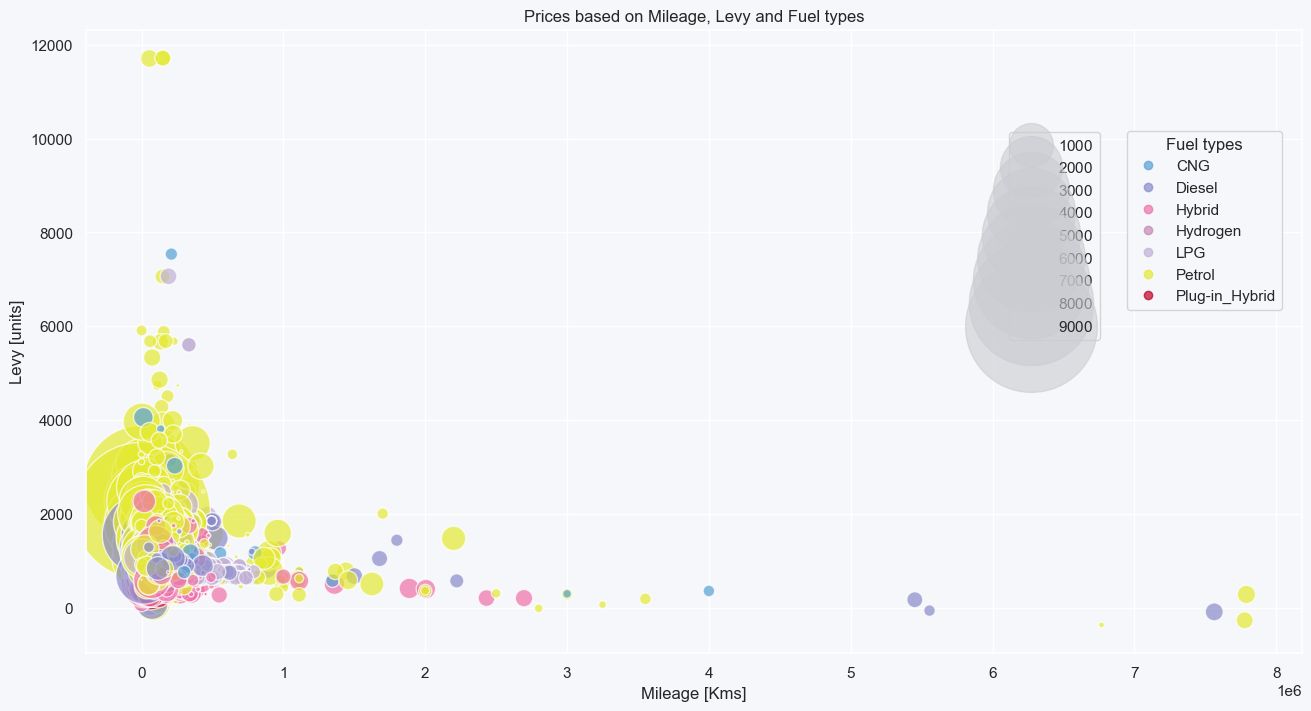

In [61]:
from sklearn.preprocessing import LabelEncoder

cmap = colors.ListedColormap(['#56a0d3', '#8a8acb', '#ee70a6', '#c587b3', '#c1b0d5', '#e4e932', '#be0027'])

# matplotlib cannot handle text labels, so encode them as integers
fuel_encoder = LabelEncoder()
fuel_labels = fuel_encoder.fit_transform(df_clean['Fuel_type'])

# plt.figure(figsize = (10,6))

fig, ax = plt.subplots(figsize=(13,7), dpi=100, layout='constrained')

scatter = plt.scatter(df_clean['Mileage_Km'],
                      df_clean['Levy'],
                      c = fuel_labels,
                      s = df_clean['Price']/90,
                      alpha = 0.7,
                      edgecolors = 'white',
                      cmap = cmap)

ax.set_title('Prices based on Mileage, Levy and Fuel types')
ax.set_xlabel('Mileage [Kms]')
ax.set_ylabel('Levy [units]')

# Color legend ---------------------------------------------
handles, labels = scatter.legend_elements()                                        # legend_elements() is a function that extracts legend handles and labels from the scatter plot.

# label conversion
label_ints = [int(''.join(i for i in x if i.isdigit())) for x in labels]           # This part converts the extracted labels into integers. It extracts digits from each label and converts them into integers.

# inverse transform
labels = fuel_encoder.inverse_transform(label_ints).tolist()                      # This line decodes the integer labels from field_labels back to their original values.

# creating and adding the legend
color_legend = ax.legend(handles=handles,                                         # This line creates a legend (colour_legend) using the handles and the decoded labels.
                          labels=labels,
                          loc="upper left",                                        # in 'loc' the legend location is specified
                          title="Fuel types",                                      # The title of the legend
                          bbox_to_anchor=(0.85, 0.85))                             # The position in relation to the plot
ax.add_artist(color_legend)


# PRICES LEGEND
entries = 6                                                     # the number of entries (or categories) in the legend.

handles, labels = scatter.legend_elements(prop="sizes",
                                          alpha=0.6,
                                          color = '#caccd1',
                                          )
# CREATING THE LEGEND -------------------------------------------
prices_legend = ax.legend(handles,
                          labels,
                          loc="lower right",                                 # Specifies the location of the legend.
                          bbox_to_anchor=(0.84, 0.49)
                          # mode="expand",                                   # This mode expands the legend to fill the available space.
                          # ncols=7,                                         # Sets the number of columns in the legend.
                          # borderpad=1.7,                                   # The parameters 'borderpad', 'labelspacing' and 'handletexpad' control the spacing and padding of the legend components.
                          #  labelspacing=2,
                          #  handletextpad=1.2
                          )


plt.show()

In [62]:
round(df_clean['Price'].describe(),1)

count     18889.0
mean      17217.2
std       19813.6
min           1.0
25%        5331.0
50%       13172.0
75%       22197.0
max      872946.0
Name: Price, dtype: float64

<div style="background-color:   rgba(0, 169, 143, 0.1); padding: 10px;">

### Dealing with Outliers

</div>

Outliers can markedly affect the models and can be a valuable source of information, providing us insights about behaviours.

1. The primary concern is to establsih a **threshold that defines an observation as an outlier**. To do so, **I will standardize the Price data and check the tails of the distribution**

In [63]:
from sklearn.preprocessing import StandardScaler

# Reshape the 'Price' column into a 2D array
price_2d = df_clean['Price'].values.reshape(-1, 1)

# Standardize the 'Price' column
Price_scaled = StandardScaler().fit_transform(price_2d)

# Get the low and high range
low_range = Price_scaled[Price_scaled[:,0].argsort()][:10]
high_range = Price_scaled[Price_scaled[:,0].argsort()][-10:]

print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.86893116]
 [-0.86893116]
 [-0.86883022]
 [-0.86883022]
 [-0.86883022]
 [-0.86883022]
 [-0.86883022]
 [-0.86883022]
 [-0.86883022]
 [-0.86883022]]

outer range (high) of the distribution:
[[10.68574421]
 [11.77790012]
 [11.95202729]
 [12.26858544]
 [13.6931476 ]
 [14.1680353 ]
 [14.1680353 ]
 [14.72201207]
 [30.78784299]
 [43.19003822]]


<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

- Low range values are similar and not too far from 0.
- High range values are from 0 and there are values way too out of range.
</div>

<div style="background-color:   rgba(255, 153, 51, 0.1); padding: 10px;">
<b> VIA 1</b>: Analysis of scatter plots Levy vs Price, Engine_volume vs Price, Mileage_Km vs Price
</div>

In [64]:
# # Levy vs Price
#
# plt.figure(figsize = (5,5))
#
# sns.scatterplot(x = df_clean['Levy'],
#                 y = df_clean['Price'],
#                 color = "#6a9c84")
#
# plt.show()



<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

- The two points in the top of the plot in Levy vs Price is quite far from the crowd and is not following any trend with respect the other observation. Speculating about these points, I could say that these correspond to cars with extremely high price in the market <font color=red>(info about Levy)</font>. Therefore, I will define them as outliers and delete them.
- I am cautious with the point with very high Levy, since it may follow the trend of the crowd (?)
 </div>

In [65]:
# # The observations I consider outliers in the scatter plot Levy vs Price
# display(df_clean.sort_values(by = 'Price', ascending = False)[:10])
#
# # Delete the outliers
# df_clean = df_clean.drop(df_clean[df_clean['Price'] > 250000].index)
# # df_clean = df_clean.drop(df_clean[df_clean['Price'] == 627220].index)

In [66]:
# plt.figure(figsize = (5,5))
#
# sns.scatterplot(x = df_clean['Levy'],
#                 y = df_clean['Price'],
#                 color = "#6a9c84")
#
# plt.show()

In [67]:
# # Engine_volume vs Price
#
# plt.figure(figsize = (5,5))
#
# sns.scatterplot(x = df_clean['Engine_volume'],
#                 y = df_clean['Price'],
#                 color = "#6a9c84")
#
# plt.show()

In [68]:
# # Mileage_Km vs Price
#
# plt.figure(figsize=(5, 5))
#
# sns.scatterplot(x=df_clean['Mileage_Km'],
#                 y=df_clean['Price'],
#                 color="#6a9c84")
#
# plt.show()

- The same happen with the two point on top in the plots Engine_volume vs Price and Mileage_Km vs Price. <font color=red>(info about Cylinders and Engine_volume)</font>

<div style="background-color:   rgba(255, 153, 51, 0.1); padding: 10px;">
<b>VIA 2</b>: Dealing with outliers using the method <b>Capping</b> with the <b>Interquartile range</b>

</div>

**Capping**, also known as **Winsorizing**, is a method to deal with outliers by setting a threshold and capping (or clipping) extreme values to be no larger (or smaller) than that threshold. This helps to mitigate the impact of outliers on statistical analyses or machine learning models.

In [69]:
import pickle
# Function to remove outliers using IQR method
def capping_outliers_iqr(df, col):

    # Boxplot before applying IQR
    fig, ax = plt.subplots(nrows = 1,
                           ncols = 2,
                           figsize = (14,5))

    sns.boxenplot(data = df,
                  x = col,
                  color = '#56a0d3',
                  width=0.5,
                  orient = 'v',
                  ax = ax[0]
                  )
    ax[0].set_title('Before')

    # Finding IQR for 'col'
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Finding the lower and upper boundaries
    if Q1 - 1.5 * IQR > 0:
        lower_bound = Q1 - 1.5 * IQR
    else:
        lower_bound = 0
    upper_bound = Q3 + 1.5 * IQR

    # Number of outliers before Capping
    num_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print('Number of Outliers before Capping: {}'.format(num_outliers))

    # Capping values above the threshold
    df[col] = np.clip(df[col],                                            # np.clip: Used to limit the values in an array or pandas Series to be within the range [a_min, a_max]
                      a_min = lower_bound,
                      a_max = upper_bound)

    # # Filter dataframe to keep values within the bounds
    # df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    # Boxplot after applying IQR
    sns.boxenplot(data = df,
                  x = col,
                  color = '#56a0d3',
                  width=0.5,
                  orient = 'v',
                  ax = ax[1]
                  )
    ax[1].set_title('After')

    plt.show()

    return df

Number of Outliers before Capping: 1038


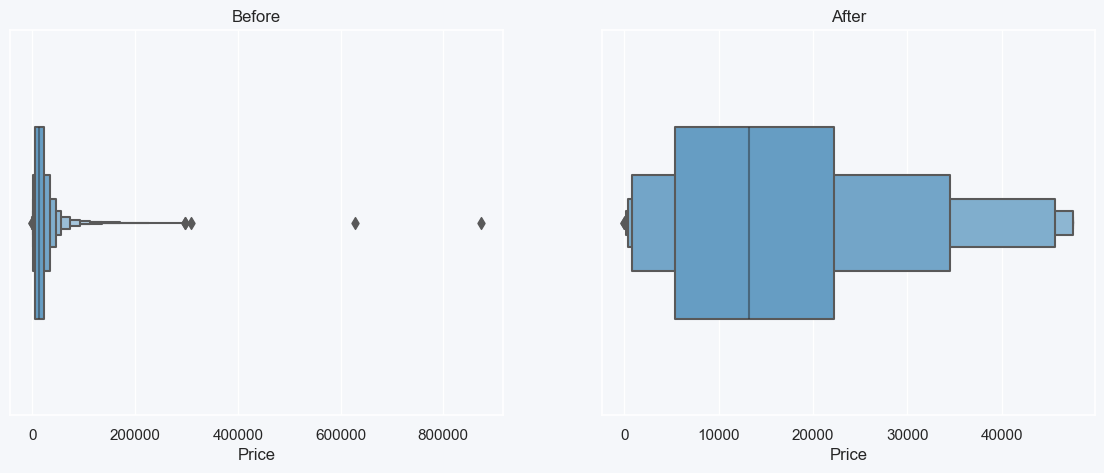

In [70]:
# Apply the function to remove outliers from 'Price'
df_clean = capping_outliers_iqr(df_clean, 'Price')

Number of Outliers before Capping: 971


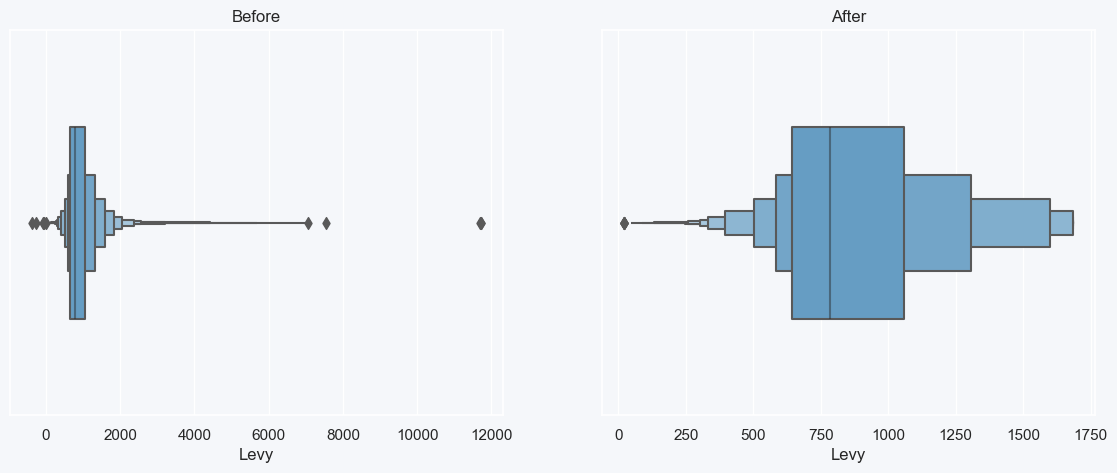

In [71]:
# Apply the function to remove outliers from 'Levy'
df_clean = capping_outliers_iqr(df_clean, 'Levy')

Number of Outliers before Capping: 606


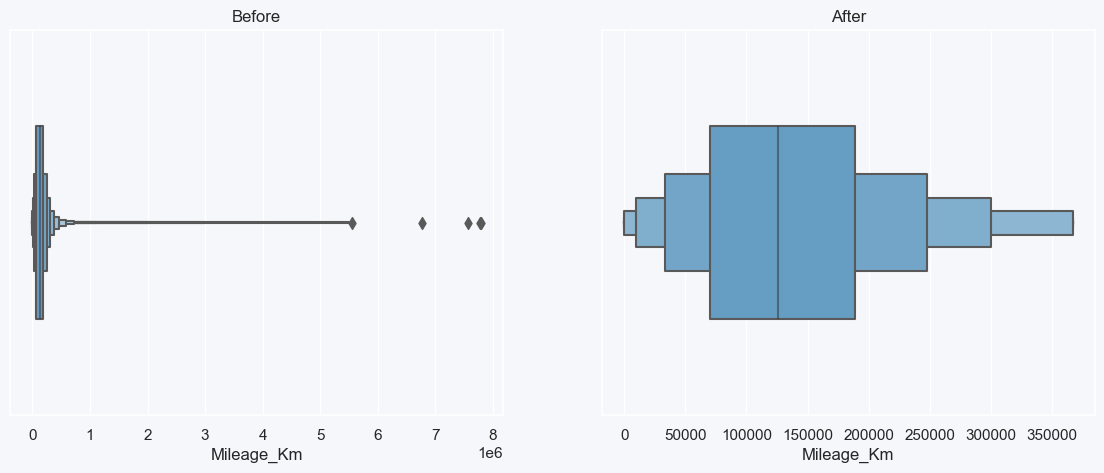

In [72]:
# Apply the function to remove outliers from 'Mileage_Km'
df_clean = capping_outliers_iqr(df_clean, 'Mileage_Km')

Number of Outliers before Capping: 1358


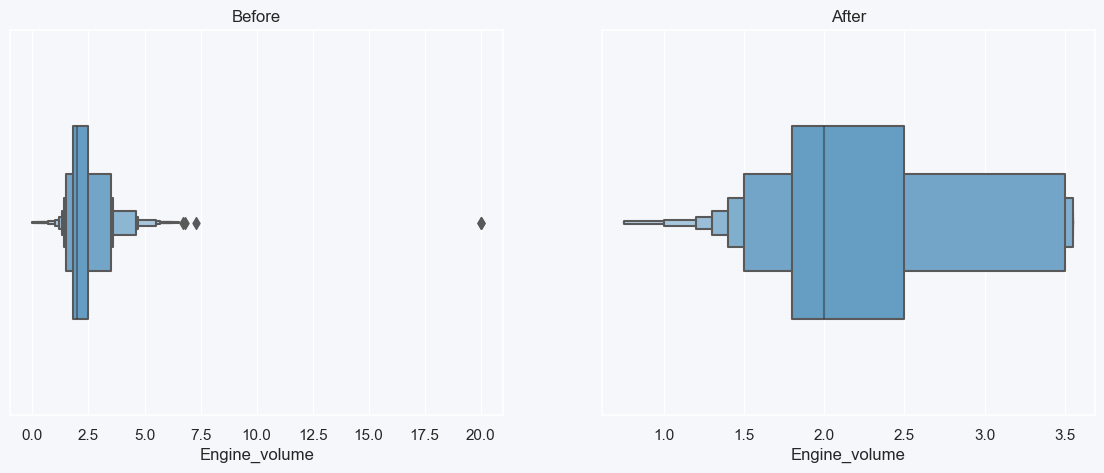

In [73]:
# Apply the function to remove outliers from 'Engine_volume'
df_clean = capping_outliers_iqr(df_clean, 'Engine_volume')

**Analysis of Skewness in Numerical variables:**

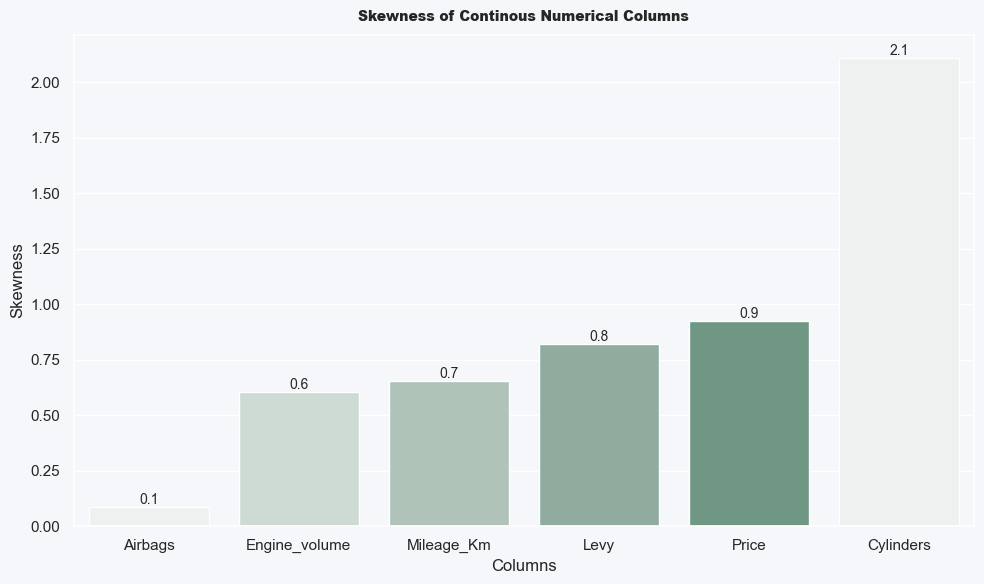

In [74]:
# Compute and sort the skewness coefficient
skewness = df_clean[cols_num].skew().sort_values()
skewness

# Plot the skewness for each numerical variable
plt.figure(figsize = [10,6])

sns.barplot(x = skewness.index,
            y = skewness,
            palette = sns.light_palette("#6a9c84",5))

for i, coef in enumerate(skewness):
    plt.text(i,
             coef,
             f"{coef:.1f}",
             ha="center",
             va="bottom",
             size=10)

plt.ylabel("Skewness")
plt.xlabel("Columns")

# plt.xticks(rotation=90)

plt.title("Skewness of Continous Numerical Columns",fontweight="black",size=10,pad=10)

plt.tight_layout()
plt.show()

<div style="background-color:   rgba(138, 138, 203, 0.1); padding: 10px;">

- **Airbags** is not skewed
- **Mileage_Km**, **Engine_volume**, **Levy**, and **Price** are slightly positive skewed variables.
- **Cylinders** is highly positive skewed.

</div>

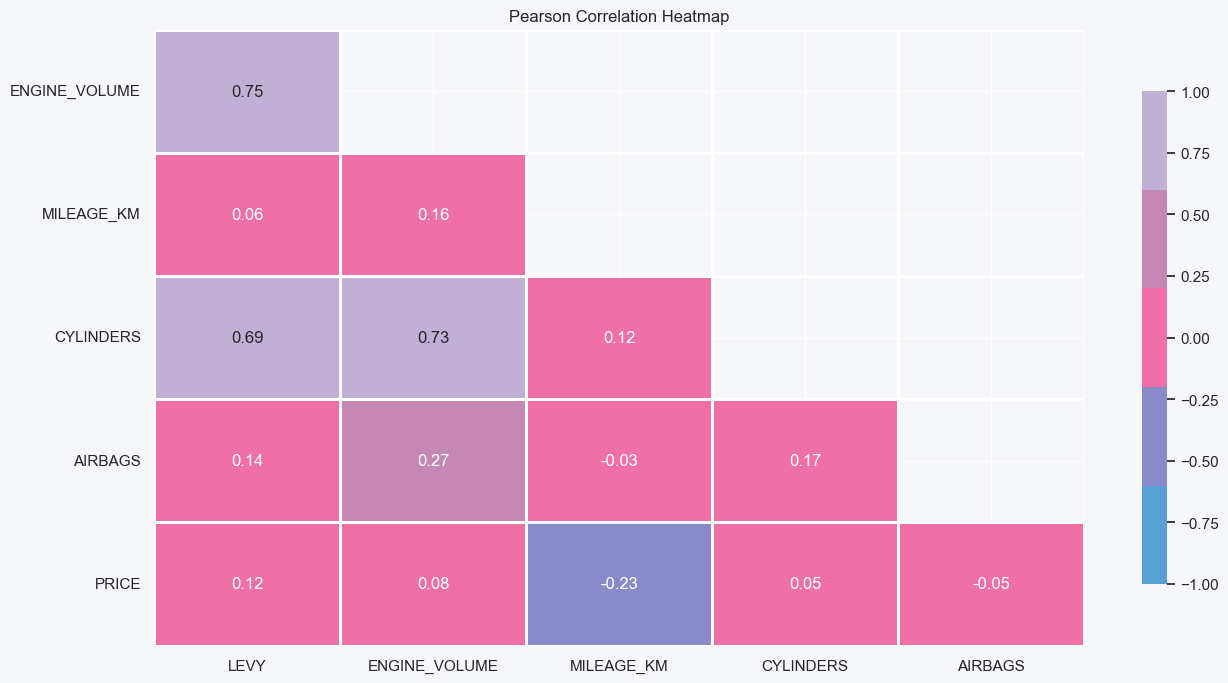

In [77]:
cmap = colors.ListedColormap(['#56a0d3', '#8a8acb', '#ee70a6', '#c587b3', '#c1b0d5'])
corr_heatmap(df_clean)

In [146]:
# Save the clean dataset with no outliers
df_clean.to_pickle('df_clean')

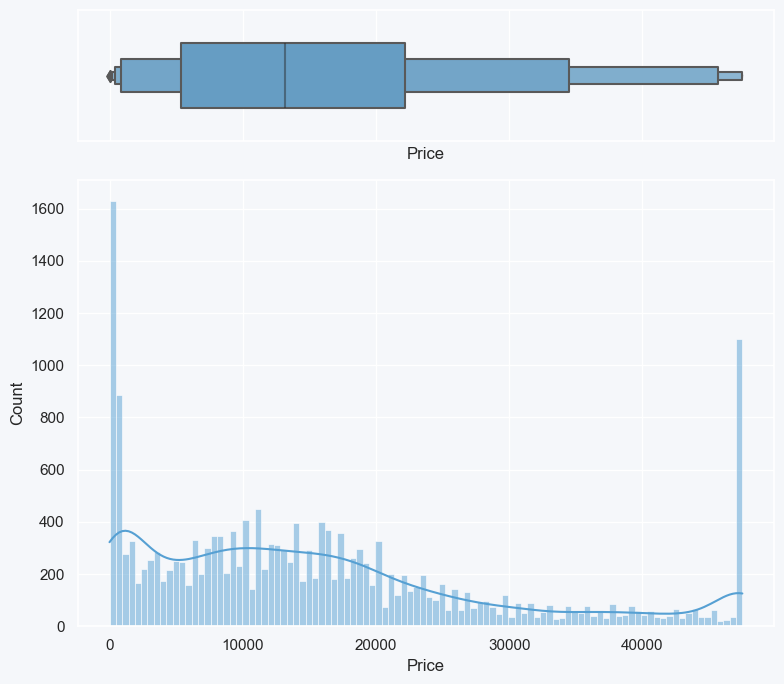

In [75]:
# Density Plot for Price

fig, ax = plt.subplots(nrows = 2,
                       ncols = 1,
                       sharex = 'col',
                       figsize = (8,7),
                       gridspec_kw={"height_ratios": (.25, .85)})

sns.boxenplot(data = df_clean,
            x = 'Price',
            color = '#56a0d3',
            width=0.5,
            ax = ax[0],
            orient = 'h')

sns.histplot(df_clean,
             x = 'Price',
             bins = 100,
             kde = True,
             color = '#56a0d3',
             ax = ax[1])

plt.tight_layout()
plt.show();